**Análisis de modelos**

**Preparación de datos**

Importamos los datos, preparamos el dataset y creamos los conjuntos de entrenamiento.

Creamos conjuntos de entrenamiento con diferentes algoritmos de oversampling

In [1]:
from sklearn.model_selection import train_test_split
from src.data_utils.data_utils import read_data, prepare_dummy_cols, normalize_num_vars

excel_file_path = "D:\\develop\\predict_lapse\\data\\BBDD_Impago_1.0.xlsx"

df = read_data(excel_file_path)

cat_vars = ['Canal', 'Domiciliacion', 'Figuras', 'Motor', 'Pago', 'SegundoConductor', 'Tipo_Furgoneta', 'Tipo_Moto', 'Tipo_Turismo',  'Zonas_Zona1', 'Zonas_Zona2', 'Zonas_Zona3', 'Zonas_Zona4', 'Zonas_Zona5', 'Zonas_Zona6', 'Zonas_Zona7', 'Zonas_Zona8']

feature_cols = ['Pago', 'Domiciliacion', 'Anyomatricula', 'Prima', 'Valor',
                'ValorVehículo', 'Motor_2', 'Motor_3', 'Canal', 'Socioec', 'Antigüedad', 'Carnet', 'SegundoConductor', 'Figuras', 'Tipo_Moto', 'Tipo_Turismo', 'Zonas_Zona2', 'Zonas_Zona3', 'Zonas_Zona4', 'Zonas_Zona5', 'Zonas_Zona6', 'Zonas_Zona7', 'Zonas_Zona8']

df_dummy = prepare_dummy_cols(df, ['Tipo', 'Zonas', 'Motor'] )

num_vars = ['Anyomatricula', 'Valor', 'Prima', 'ValorVehículo', 'Socioec','Antigüedad', 'Carnet']

X = df_dummy[feature_cols]
y = df['Impago']

# Importante que la variable objetivo se distribuya en el conjunto de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = normalize_num_vars(X_train, num_vars)
X_test = normalize_num_vars(X_test, num_vars)

X_cat = df.drop(columns=['Impago'])
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=42, stratify=y)
X_train_cat = normalize_num_vars(X_train_cat, num_vars)
X_test_cat = normalize_num_vars(X_test_cat, num_vars)


Configuramos los diferentes grids que vamos a utilizar con RandomSearch, utilizamos los grid de manera iterativa, vamos afinando poco a poco.

In [7]:
param_grid_rf = {
    "max_depth": [6, 9, 14],
    "min_samples_split": [2, 5, 10, 20, 50],
    "min_samples_leaf": [3, 6, 10, 20],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True],
    "class_weight": ["balanced", "balanced_subsample"],
    "max_samples": [0.7, 0.9]
}

param_grid_rf_2 = {
    "class_weight": ["balanced", "balanced_subsample"],
    "max_depth": [12, 14, 16, 18],
    "max_features": ["sqrt", "log2", 0.3],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [2, 3, 4, 6],
    "max_samples": [0.8, 0.9, 1.0],
    "n_estimators": [400, 700, 1000],
    "ccp_alpha": [0.0, 1e-4],
}

param_grid_rf_3 = {
    "bootstrap": [True],
    "class_weight": ["balanced_subsample"],
    "max_depth": [12, 16, 18],
    "min_samples_leaf": [3, 8, 15],
    "min_samples_split": [2, 20],
    "max_features": [0.3, "sqrt"],
    "max_samples": [0.7, 0.9],
    "ccp_alpha": [0.0, 1e-4, 1e-3],
    "n_estimators": [600],
}

param_grid_rf_4 = {
    "bootstrap": [True],
    "class_weight": ["balanced_subsample"],
    "n_estimators": [600, 900],
    "max_depth": [16, 18],
    "max_features": [0.3, "sqrt"],
    "max_samples": [0.6, 0.7, 0.8],
    "min_samples_leaf": [3, 6, 10, 15],
    "min_samples_split": [2, 10, 20, 50],
    "ccp_alpha": [0.0, 1e-5, 1e-4, 5e-4, 1e-3],
}


param_grid_xgb = {
    "n_estimators": [300, 600],
    "learning_rate": [0.03, 0.07],
    "max_depth": [3, 4, 5],
    "min_child_weight": [1, 5, 10],
    "subsample": [0.7, 0.9],
    "colsample_bytree": [0.6, 0.8],
    "gamma": [0, 1, 2],
    "reg_lambda": [1, 5, 10],
    "reg_alpha": [0, 1, 3],
    "scale_pos_weight" : [10, 20, 30, 40]
}

param_grid_xgb_2 = {
    "max_depth": [4, 5, 6],
    "min_child_weight": [8, 10],
    "gamma": [0.5, 1.0],
    "subsample": [0.85, 0.9],
    "colsample_bytree": [0.75, 0.8],
    "scale_pos_weight": [8, 10],
    "learning_rate": [0.03],
    "n_estimators": [300],
    "reg_alpha": [0],
    "reg_lambda": [1],
}

param_grid_xgb_3 = {
    "max_depth": [4, 5, 6],
    "min_child_weight": [6, 8, 10],
    "gamma": [0.0, 0.5, 1.0],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "scale_pos_weight": [6, 8, 10],
    "learning_rate": [0.03],
    "n_estimators": [300],
    "reg_alpha": [0],
    "reg_lambda": [1],
}

param_grid_xgb_4 = {
    "max_depth": [4, 5, 6],
    "min_child_weight": [4, 6, 8],
    "gamma": [0.0, 0.1, 0.3],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "scale_pos_weight": [5, 6, 7, 8],
    "reg_alpha": [0, 0.5, 1],
    "reg_lambda": [0.5, 1, 2, 5],
    "learning_rate": [0.03],
    "n_estimators": [300],
}

param_grid_xgb_5 = {
    "max_depth":        [5,6],
    "min_child_weight": [6, 8, 10],
    "gamma":            [0.2, 0.3],
    "subsample":        [1.0],
    "colsample_bytree": [0.7],
    "reg_alpha":        [1, 2, 2.5],
    "reg_lambda":       [1, 1.5],
    "scale_pos_weight": [1],
    "n_estimators": [450, 600]
}

param_grid_xgb_5b = {
    "max_depth":        [5, 6],
    "min_child_weight": [4, 6, 8],
    "gamma":            [0.0, 0.2, 0.3],
    "subsample":        [0.85, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8],
    "reg_alpha":        [0, 1, 2, 4],
    "reg_lambda":       [0.5, 1, 2],
    "scale_pos_weight": [1],
    "n_estimators": [450, 600],
}

param_grid_xgb_6 = {
    "max_depth":        [5, 6],
    "min_child_weight": [4, 6, 8],
    "gamma":            [0.0, 0.3, 0.6],
    "subsample":        [0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8],
    "reg_alpha":        [1, 2, 4],
    "reg_lambda":       [0.5, 1, 2, 5],
    "scale_pos_weight": [4, 5, 6, 8],
    "learning_rate":    [0.03],
    "n_estimators": [400]
}

param_grid_xgb_final = {
    "learning_rate":    [0.03],
    "max_depth":        [5, 6],
    "min_child_weight": [4, 6, 8],
    "gamma":            [0.1, 0.2, 0.3],
    "subsample":        [0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "reg_alpha":        [2, 4, 6],
    "reg_lambda":       [0.5, 1.0, 2.0],
    "scale_pos_weight": [3, 4, 5],
    "n_estimators": [400]
}

param_grid_xgb_final_2 = {
    "learning_rate":    [0.03],
    "max_depth":        [4, 5, 6],
    "min_child_weight": [3, 4, 5],
    "gamma":            [0.0, 0.2, 0.4],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "subsample":        [0.85, 0.95, 1.0],
    "reg_alpha":        [3, 4, 5],
    "reg_lambda":       [0.5, 1.0, 2.0],
    "scale_pos_weight": [2, 3, 4],
    "n_estimators": [400]
}

param_grid_xgb_final_2 = {
    "learning_rate":    [0.03],
    "max_depth":        [5, 6],
    "min_child_weight": [4, 5],
    "gamma":            [0.2, 0.3, 0.4],
    "colsample_bytree": [0.7, 0.8],
    "subsample":        [0.85, 0.95, 1.0],
    "reg_alpha":        [3, 4],
    "reg_lambda":       [0.5, 1.0, 1.5],
    "scale_pos_weight": [3, 4],
    "n_estimators": [400]
}

param_grid_xgb_final_3 = {
    "max_depth":        [5, 6],
    "min_child_weight": [6, 12],
    "gamma": [0.2, 1.0],
    "subsample":        [0.8, 0.9],
    "colsample_bytree": [0.6, 0.7, 0.8],
    "reg_alpha":        [0, 1, 2, 4],
    "reg_lambda": [1.0, 3.0],
    "scale_pos_weight": [1, 5.75, 16.5, 33.0],
    "n_estimators": [350, 450],
}


param_grid_lgbm = {
    "n_estimators": [600, 1200],
    "learning_rate": [0.03, 0.05],
    "num_leaves": [31, 63, 127],
    "min_child_samples": [10, 30, 60],
    "max_depth": [-1, 10, 15],
    "subsample": [0.7, 0.9],
    "colsample_bytree": [0.6, 0.8],
    "reg_alpha": [0.0, 0.5, 1.0],
    "reg_lambda": [0.0, 1.0, 5.0],
}

param_grid_lgbm_2 = {
    "n_estimators": [900, 1200],
    "learning_rate": [0.03],
    "num_leaves": [31, 63, 127],
    "min_child_samples": [30, 60, 90],
    "max_depth": [-1],
    "subsample": [0.7],
    "colsample_bytree": [0.8],
    "reg_alpha": [0.5],
    "reg_lambda": [5.0],
}


param_grid_lgbm_3 = {
    "learning_rate": [0.03],
    "n_estimators": [900, 1200],
    "max_depth": [-1],
    "num_leaves": [63, 95, 127, 159],
    "min_child_samples": [60, 75, 90, 120],
    "subsample": [0.6, 0.7, 0.8],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "reg_alpha": [0.0, 0.5, 1.0],
    "reg_lambda": [3.0, 5.0, 8.0],
    "min_split_gain": [0.0, 0.02, 0.05, 0.10],
}


param_grid_lgbm_4 = {
    "learning_rate": [0.03],
    "n_estimators": [800, 1200, 1600],

    "num_leaves": [63, 127, 159],
    "min_child_samples": [60, 75, 100, 140],

    "min_split_gain": [0.05, 0.1, 0.15],

    "subsample": [0.55, 0.6, 0.7],
    "colsample_bytree": [0.8, 0.9, 1.0],

    "reg_lambda": [5.0, 8.0, 12.0],
    "reg_alpha": [0.0],
    "max_depth": [-1],
}

param_grid_lgbm_lastshot = {
    "learning_rate": [0.03],
    "n_estimators": [800, 1200],
    "num_leaves": [63, 127],
    "min_child_samples": [60, 100, 140],
    "reg_lambda": [5.0, 8.0, 12.0],
    "subsample": [0.55],
    "colsample_bytree": [0.9],
    "min_split_gain": [0.1],
    "max_depth": [-1],
}

param_grid_cb_1 = {
    "iterations": [800, 1200],
    "learning_rate": [0.03],
    "depth": [4, 6, 8],
    "l2_leaf_reg": [3, 10],
    "min_data_in_leaf": [30, 100],
    "bagging_temperature": [0.0, 1.0],
    "rsm": [0.8, 0.9],
    "scale_pos_weight": [1, 20, 30],
}

param_grid_cb_2 = {
    "iterations": [800],
    "learning_rate": [0.03],
    "bagging_temperature": [0.0],
    "scale_pos_weight": [1],
    "depth": [3, 4, 5],
    "min_data_in_leaf": [20, 30, 50],
    "l2_leaf_reg": [3, 6],
    "rsm": [0.8, 0.9],
    "random_strength": [1],
}


Ejecutamos el Modelo Random Forest con GridSearch

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from contextlib import contextmanager
from tqdm.auto import tqdm
from sklearn.model_selection import ParameterGrid


rf = RandomForestClassifier(
    random_state=42,
    bootstrap=True,
    n_jobs=1
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf_4,
    scoring="average_precision",   # PR-AUC (mejor para 3% positivos)
    cv=cv,
    n_jobs=-1,
    verbose=2
)

@contextmanager
def tqdm_joblib(tqdm_object):
    class TqdmBatchCompletionCallback(joblib.parallel.BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)

    old_cb = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_cb
        tqdm_object.close()

total_fits = len(list(ParameterGrid(param_grid_rf_4))) * cv.get_n_splits()

with tqdm_joblib(tqdm(total=total_fits, desc="GridSearch fits")):
    grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

GridSearch fits:   0%|          | 0/9600 [00:00<?, ?it/s]

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
{'bootstrap': True, 'ccp_alpha': 1e-05, 'class_weight': 'balanced_subsample', 'max_depth': 18, 'max_features': 0.3, 'max_samples': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 600}
0.4848308347135607


Ejecutamos XGBosst con GridSearch

In [88]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from contextlib import contextmanager
from tqdm.auto import tqdm
from sklearn.model_selection import ParameterGrid
from xgboost import XGBClassifier


xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr",      # coherente con PR-AUC
    tree_method="hist",       # rápido
    n_jobs=1,
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb_final_3,
    scoring="average_precision",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

@contextmanager
def tqdm_joblib(tqdm_object):
    class TqdmBatchCompletionCallback(joblib.parallel.BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)

    old_cb = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_cb
        tqdm_object.close()

total_fits = len(list(ParameterGrid(param_grid_xgb_final_3))) * cv.get_n_splits()

with tqdm_joblib(tqdm(total=total_fits, desc="GridSearch fits")):
    grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

GridSearch fits:   0%|          | 0/15360 [00:00<?, ?it/s]

Fitting 5 folds for each of 3072 candidates, totalling 15360 fits
{'colsample_bytree': 0.7, 'gamma': 1.0, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 450, 'reg_alpha': 2, 'reg_lambda': 3.0, 'scale_pos_weight': 1, 'subsample': 0.9}
0.5321626554312885


Ejecutamos LightGBM con GridSearch

In [16]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from contextlib import contextmanager
from tqdm.auto import tqdm
from sklearn.model_selection import ParameterGrid

spw = (y_train == 0).sum() / (y_train == 1).sum()

lgbm = LGBMClassifier(
    objective="binary",
    random_state=42,
    n_jobs=1,
    # muy importante en tu caso:
    # class_weight="balanced",
    scale_pos_weight=spw,
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm_lastshot,
    scoring="average_precision",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

@contextmanager
def tqdm_joblib(tqdm_object):
    class TqdmBatchCompletionCallback(joblib.parallel.BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)

    old_cb = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_cb
        tqdm_object.close()

total_fits = len(list(ParameterGrid(param_grid_lgbm_lastshot))) * cv.get_n_splits()

with tqdm_joblib(tqdm(total=total_fits, desc="GridSearch fits")):
    grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

GridSearch fits:   0%|          | 0/180 [00:00<?, ?it/s]

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': -1, 'min_child_samples': 140, 'min_split_gain': 0.1, 'n_estimators': 1200, 'num_leaves': 127, 'reg_lambda': 5.0, 'subsample': 0.55}
0.5474295850909114


Ejecutamos CatBoost con GridSearch

In [8]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, ParameterGrid
from contextlib import contextmanager
from tqdm.auto import tqdm
import joblib


cb = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    random_state=42,
    verbose=0,
    thread_count=1
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=cb,
    param_grid=param_grid_cb_2,
    scoring="average_precision",
    cv=cv,
    n_jobs=-1,
    verbose=1
)


@contextmanager
def tqdm_joblib(tqdm_object):
    class TqdmBatchCompletionCallback(joblib.parallel.BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)

    old_cb = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_cb
        tqdm_object.close()

total_fits = len(list(ParameterGrid(param_grid_cb_2))) * cv.get_n_splits()

with tqdm_joblib(tqdm(total=total_fits, desc="GridSearch fits")):
    grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)


GridSearch fits:   0%|          | 0/180 [00:00<?, ?it/s]

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'bagging_temperature': 0.0, 'depth': 4, 'iterations': 800, 'l2_leaf_reg': 3, 'learning_rate': 0.03, 'min_data_in_leaf': 20, 'random_strength': 1, 'rsm': 0.9, 'scale_pos_weight': 1}
0.559381316210515


Por último, ejecutamos los modelos con los mejores parámetros conseguidos. Ejecutamos Random Forest

[Random_Forest] Accuracy train: 0.9757 | test: 0.9595
[Random_Forest] Balanced Acc train: 0.9317 | test: 0.7818
[Random_Forest] Precision(1): 0.3792 | Recall(1): 0.5930 | F1(1): 0.4626
[Random_Forest] Confusion matrix (test):
[[5506  167]
 [  70  102]]


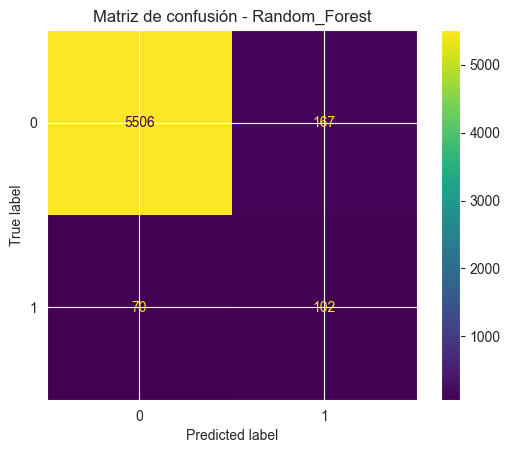

AUC-ROC (train): 0.9935
AUC-ROC (test) : 0.8893
PR-AUC  (train): 0.8462
PR-AUC  (test) : 0.5496
[Random_Forest] Accuracy train: 0.9696 | test: 0.9471
[Random_Forest] Balanced Acc train: 0.9483 | test: 0.8065
[Random_Forest] Precision(1): 0.3113 | Recall(1): 0.6570 | F1(1): 0.4224
[Random_Forest] Confusion matrix (test):
[[5423  250]
 [  59  113]]


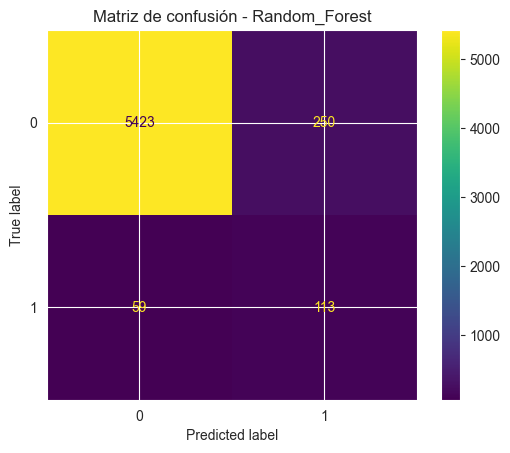

AUC-ROC (train): 0.9925
AUC-ROC (test) : 0.8789
PR-AUC  (train): 0.8364
PR-AUC  (test) : 0.5450
[Random_Forest] Accuracy train: 0.9693 | test: 0.9150
[Random_Forest] Balanced Acc train: 0.9270 | test: 0.8040
[Random_Forest] Precision(1): 0.2103 | Recall(1): 0.6860 | F1(1): 0.3220
[Random_Forest] Confusion matrix (test):
[[5230  443]
 [  54  118]]


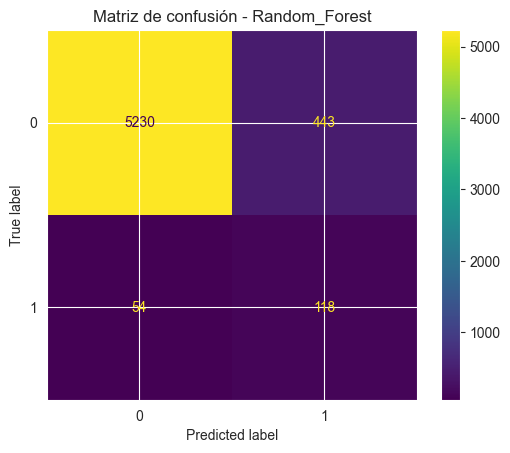

AUC-ROC (train): 0.9919
AUC-ROC (test) : 0.8701
PR-AUC  (train): 0.8328
PR-AUC  (test) : 0.5077
[Random_Forest] Accuracy train: 0.9698 | test: 0.8808
[Random_Forest] Balanced Acc train: 0.9280 | test: 0.8089
[Random_Forest] Precision(1): 0.1622 | Recall(1): 0.7326 | F1(1): 0.2655
[Random_Forest] Confusion matrix (test):
[[5022  651]
 [  46  126]]


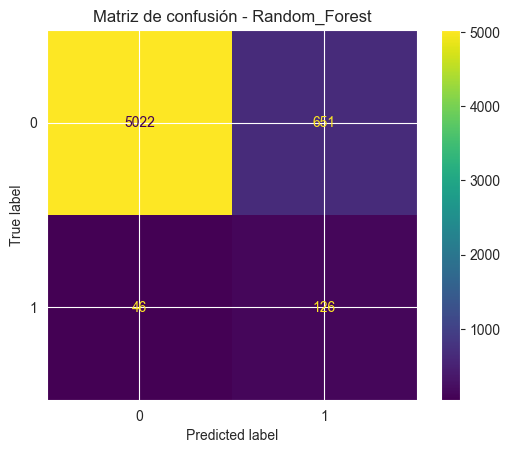

AUC-ROC (train): 0.9917
AUC-ROC (test) : 0.8787
PR-AUC  (train): 0.8335
PR-AUC  (test) : 0.5015
[Random_Forest] Accuracy train: 0.9631 | test: 0.8125
[Random_Forest] Balanced Acc train: 0.9415 | test: 0.7822
[Random_Forest] Precision(1): 0.1091 | Recall(1): 0.7500 | F1(1): 0.1905
[Random_Forest] Confusion matrix (test):
[[4620 1053]
 [  43  129]]


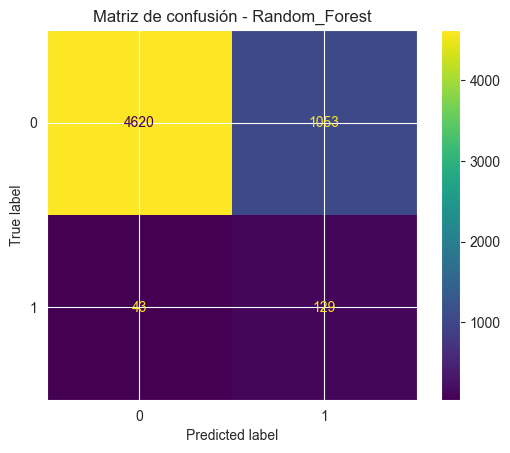

AUC-ROC (train): 0.9916
AUC-ROC (test) : 0.8660
PR-AUC  (train): 0.8331
PR-AUC  (test) : 0.4992
[Random_Forest] Accuracy train: 0.9781 | test: 0.9608
[Random_Forest] Balanced Acc train: 0.9174 | test: 0.7712
[Random_Forest] Precision(1): 0.3874 | Recall(1): 0.5698 | F1(1): 0.4612
[Random_Forest] Confusion matrix (test):
[[5518  155]
 [  74   98]]


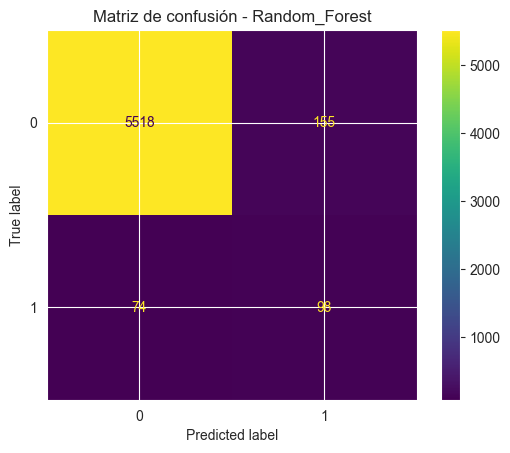

AUC-ROC (train): 0.9945
AUC-ROC (test) : 0.8893
PR-AUC  (train): 0.8823
PR-AUC  (test) : 0.5390
[Random_Forest] Accuracy train: 0.9807 | test: 0.9612
[Random_Forest] Balanced Acc train: 0.9654 | test: 0.7742
[Random_Forest] Precision(1): 0.3913 | Recall(1): 0.5756 | F1(1): 0.4659
[Random_Forest] Confusion matrix (test):
[[5519  154]
 [  73   99]]


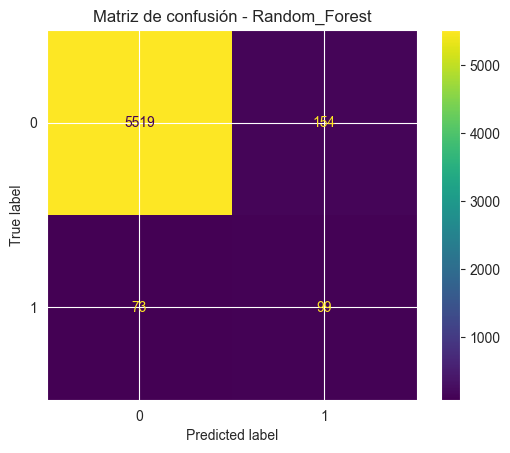

AUC-ROC (train): 0.9969
AUC-ROC (test) : 0.8897
PR-AUC  (train): 0.9335
PR-AUC  (test) : 0.5409
[Random_Forest] Accuracy train: 0.9788 | test: 0.9565
[Random_Forest] Balanced Acc train: 0.9827 | test: 0.7859
[Random_Forest] Precision(1): 0.3586 | Recall(1): 0.6047 | F1(1): 0.4502
[Random_Forest] Confusion matrix (test):
[[5487  186]
 [  68  104]]


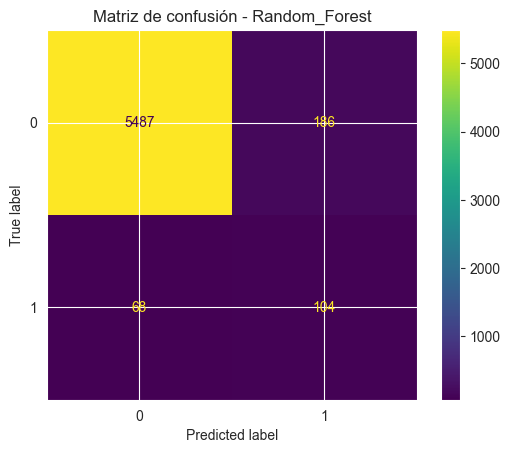

AUC-ROC (train): 0.9985
AUC-ROC (test) : 0.8900
PR-AUC  (train): 0.9655
PR-AUC  (test) : 0.5466
[Random_Forest] Accuracy train: 0.9785 | test: 0.9562
[Random_Forest] Balanced Acc train: 0.9854 | test: 0.7914
[Random_Forest] Precision(1): 0.3581 | Recall(1): 0.6163 | F1(1): 0.4530
[Random_Forest] Confusion matrix (test):
[[5483  190]
 [  66  106]]


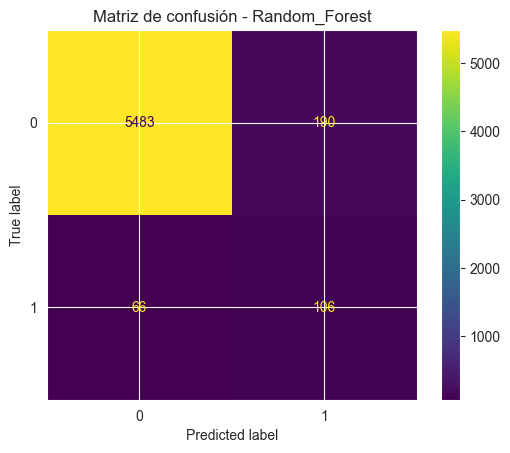

AUC-ROC (train): 0.9992
AUC-ROC (test) : 0.8902
PR-AUC  (train): 0.9802
PR-AUC  (test) : 0.5388
[Random_Forest] Accuracy train: 0.9730 | test: 0.9386
[Random_Forest] Balanced Acc train: 0.9522 | test: 0.8105
[Random_Forest] Precision(1): 0.2768 | Recall(1): 0.6744 | F1(1): 0.3926
[Random_Forest] Confusion matrix (test):
[[5370  303]
 [  56  116]]


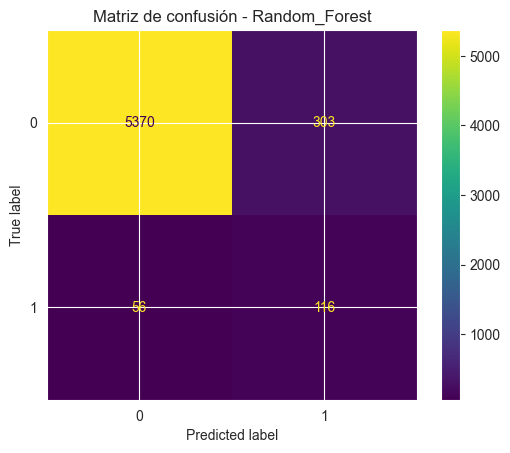

AUC-ROC (train): 0.9938
AUC-ROC (test) : 0.8795
PR-AUC  (train): 0.8572
PR-AUC  (test) : 0.5027
[Random_Forest] Accuracy train: 0.9766 | test: 0.8601
[Random_Forest] Balanced Acc train: 0.9491 | test: 0.7870
[Random_Forest] Precision(1): 0.1371 | Recall(1): 0.7093 | F1(1): 0.2298
[Random_Forest] Confusion matrix (test):
[[4905  768]
 [  50  122]]


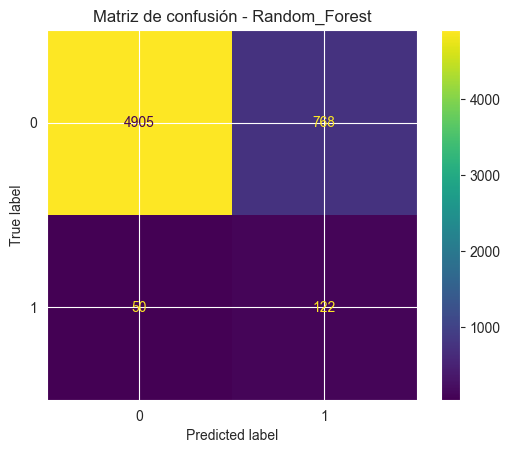

AUC-ROC (train): 0.9945
AUC-ROC (test) : 0.8613
PR-AUC  (train): 0.8732
PR-AUC  (test) : 0.4769
[Random_Forest] Accuracy train: 0.9736 | test: 0.7612
[Random_Forest] Balanced Acc train: 0.9582 | test: 0.7755
[Random_Forest] Precision(1): 0.0909 | Recall(1): 0.7907 | F1(1): 0.1631
[Random_Forest] Confusion matrix (test):
[[4313 1360]
 [  36  136]]


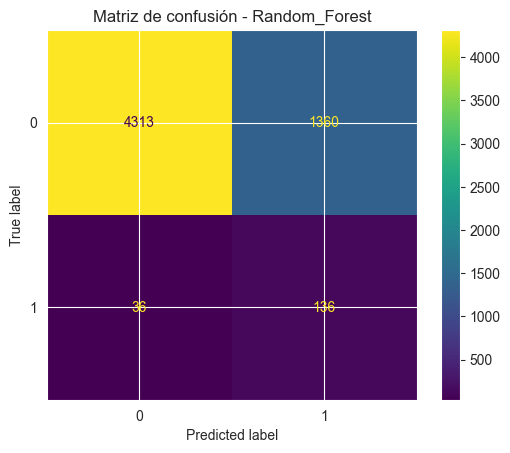

AUC-ROC (train): 0.9944
AUC-ROC (test) : 0.8651
PR-AUC  (train): 0.8752
PR-AUC  (test) : 0.4480
[Random_Forest] Accuracy train: 0.9783 | test: 0.7035
[Random_Forest] Balanced Acc train: 0.9479 | test: 0.7514
[Random_Forest] Precision(1): 0.0751 | Recall(1): 0.8023 | F1(1): 0.1374
[Random_Forest] Confusion matrix (test):
[[3974 1699]
 [  34  138]]


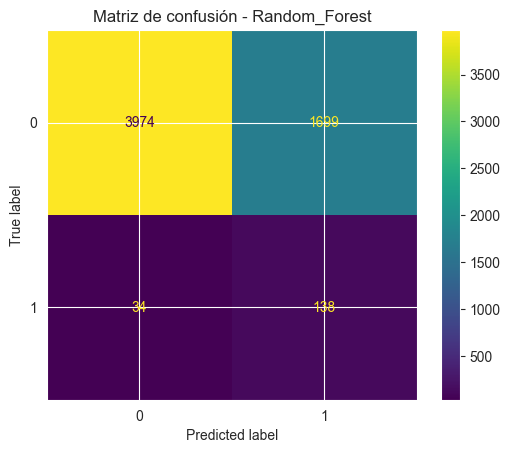

AUC-ROC (train): 0.9945
AUC-ROC (test) : 0.8517
PR-AUC  (train): 0.8758
PR-AUC  (test) : 0.4356
[Random_Forest] Accuracy train: 0.9707 | test: 0.9251
[Random_Forest] Balanced Acc train: 0.9736 | test: 0.8176
[Random_Forest] Precision(1): 0.2382 | Recall(1): 0.7035 | F1(1): 0.3559
[Random_Forest] Confusion matrix (test):
[[5286  387]
 [  51  121]]


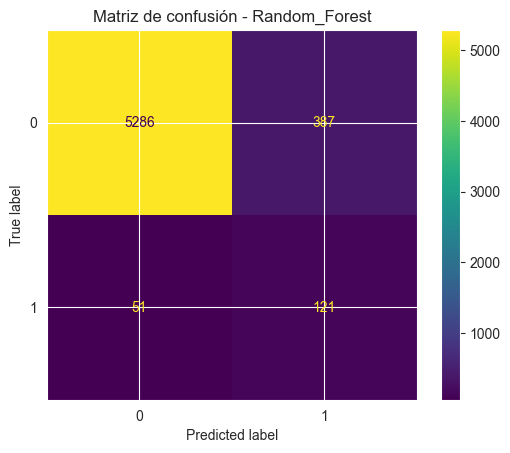

AUC-ROC (train): 0.9937
AUC-ROC (test) : 0.8729
PR-AUC  (train): 0.8539
PR-AUC  (test) : 0.5331
[Random_Forest] Accuracy train: 0.9734 | test: 0.8320
[Random_Forest] Balanced Acc train: 0.9552 | test: 0.7894
[Random_Forest] Precision(1): 0.1201 | Recall(1): 0.7442 | F1(1): 0.2068
[Random_Forest] Confusion matrix (test):
[[4735  938]
 [  44  128]]


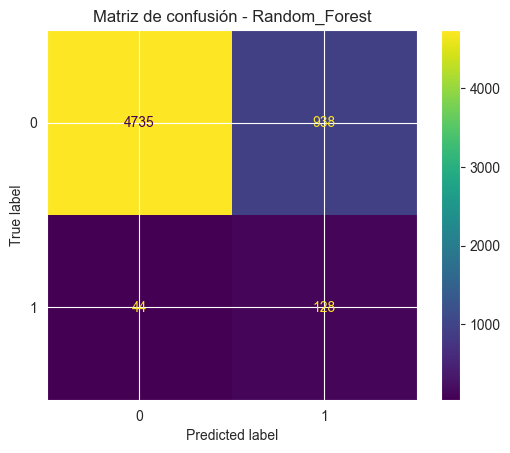

AUC-ROC (train): 0.9939
AUC-ROC (test) : 0.8638
PR-AUC  (train): 0.8636
PR-AUC  (test) : 0.4868
[Random_Forest] Accuracy train: 0.9763 | test: 0.7831
[Random_Forest] Balanced Acc train: 0.9384 | test: 0.7727
[Random_Forest] Precision(1): 0.0965 | Recall(1): 0.7616 | F1(1): 0.1712
[Random_Forest] Confusion matrix (test):
[[4446 1227]
 [  41  131]]


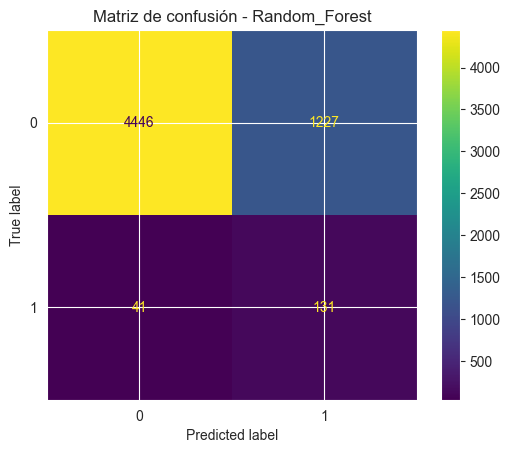

AUC-ROC (train): 0.9942
AUC-ROC (test) : 0.8605
PR-AUC  (train): 0.8706
PR-AUC  (test) : 0.4703
[Random_Forest] Accuracy train: 0.9699 | test: 0.6683
[Random_Forest] Balanced Acc train: 0.9655 | test: 0.7502
[Random_Forest] Precision(1): 0.0701 | Recall(1): 0.8372 | F1(1): 0.1293
[Random_Forest] Confusion matrix (test):
[[3762 1911]
 [  28  144]]


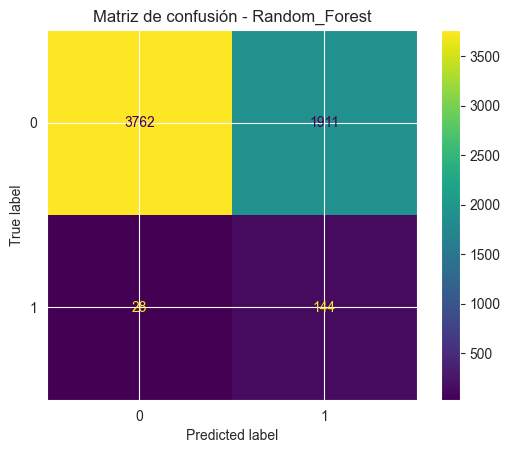

AUC-ROC (train): 0.9940
AUC-ROC (test) : 0.8597
PR-AUC  (train): 0.8705
PR-AUC  (test) : 0.4662
[Random_Forest] Accuracy train: 0.9769 | test: 0.9499
[Random_Forest] Balanced Acc train: 0.8914 | test: 0.8135
[Random_Forest] Precision(1): 0.3276 | Recall(1): 0.6686 | F1(1): 0.4398
[Random_Forest] Confusion matrix (test):
[[5437  236]
 [  57  115]]


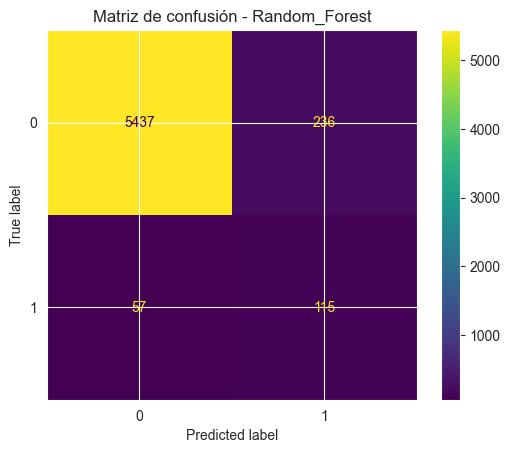

AUC-ROC (train): 0.9928
AUC-ROC (test) : 0.8760
PR-AUC  (train): 0.8429
PR-AUC  (test) : 0.5124
[Random_Forest] Accuracy train: 0.9762 | test: 0.9232
[Random_Forest] Balanced Acc train: 0.9045 | test: 0.8110
[Random_Forest] Precision(1): 0.2311 | Recall(1): 0.6919 | F1(1): 0.3464
[Random_Forest] Confusion matrix (test):
[[5277  396]
 [  53  119]]


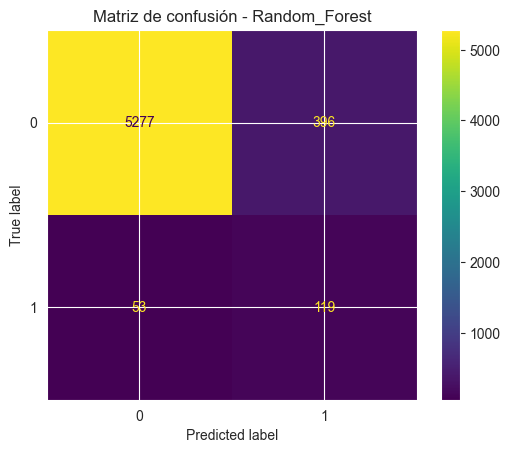

AUC-ROC (train): 0.9924
AUC-ROC (test) : 0.8743
PR-AUC  (train): 0.8383
PR-AUC  (test) : 0.4823
[Random_Forest] Accuracy train: 0.9727 | test: 0.8130
[Random_Forest] Balanced Acc train: 0.9210 | test: 0.7881
[Random_Forest] Precision(1): 0.1107 | Recall(1): 0.7616 | F1(1): 0.1934
[Random_Forest] Confusion matrix (test):
[[4621 1052]
 [  41  131]]


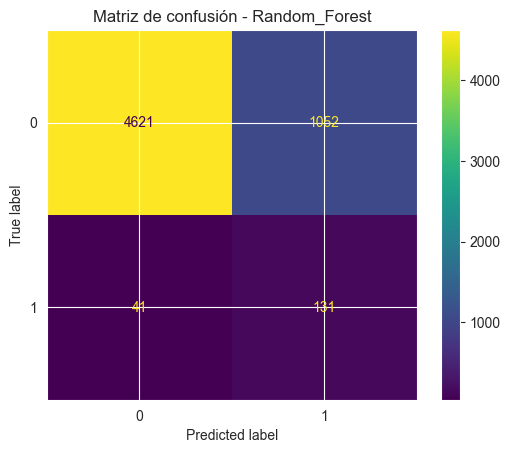

AUC-ROC (train): 0.9917
AUC-ROC (test) : 0.8704
PR-AUC  (train): 0.8357
PR-AUC  (test) : 0.4650
[Random_Forest] Accuracy train: 0.9831 | test: 0.9343
[Random_Forest] Balanced Acc train: 0.8508 | test: 0.8027
[Random_Forest] Precision(1): 0.2591 | Recall(1): 0.6628 | F1(1): 0.3725
[Random_Forest] Confusion matrix (test):
[[5347  326]
 [  58  114]]


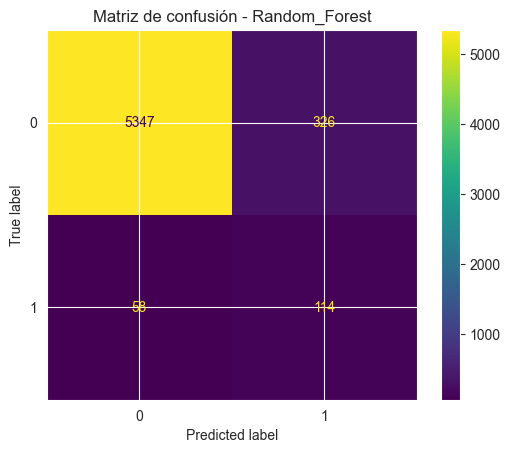

AUC-ROC (train): 0.9914
AUC-ROC (test) : 0.8704
PR-AUC  (train): 0.8340
PR-AUC  (test) : 0.4551


In [13]:
from src.model_utils.mod_evaluation import run_model_and_evaluate
from sklearn.ensemble import RandomForestClassifier

# Creamos la lista results para empezar a guardar los resultados de las ejecuciones
results = []

# Creamos el modelo Random Forest con los mejores parámetros
model = RandomForestClassifier(
            n_estimators=600, random_state=42,
            n_jobs=-1,
            max_depth=18,
            min_samples_leaf=3,
            min_samples_split=2,
            max_features=0.3,
            bootstrap=True,
            max_samples=0.7,
            ccp_alpha=1e-05
        )

# Ejecutamos el modelo RF con los mejores parámetros y obtenemos las métricas, guardamos los resultados para
# todas las ejecuciones con diferentes samplers y diferentes ratios.

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model
            )
results.append({**ex, **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "svm_smote", 0.05
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "svm_smote", 0.1
            )
results.append({**ex, **rf, **aucs, "fp": len(fp), "fn": len(fn)})


rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "svm_smote", 0.15
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "svm_smote", 0.2)

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "ro", 0.05
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "ro", 0.1
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "ro", 0.15
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "ro", 0.2
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "adasyn", 0.05
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "adasyn", 0.1
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "adasyn", 0.15
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "adasyn", 0.2
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "smote", 0.05
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "smote", 0.1
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "smote", 0.15
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "smote", 0.2
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "b_smote", 0.05
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "b_smote", 0.1
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "b_smote", 0.15
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test,
                'Random_Forest', model,
                "b_smote", 0.2
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})


A continuación ejecutamos el modelo XGBoost

Best iteration:  813
[XGBoost] Accuracy train: 0.9530 | test: 0.9514
[XGBoost] Balanced Acc train: 0.8304 | test: 0.8002
[XGBoost] Precision(1): 0.3313 | Recall(1): 0.6395 | F1(1): 0.4365
[XGBoost] Confusion matrix (test):
[[5451  222]
 [  62  110]]


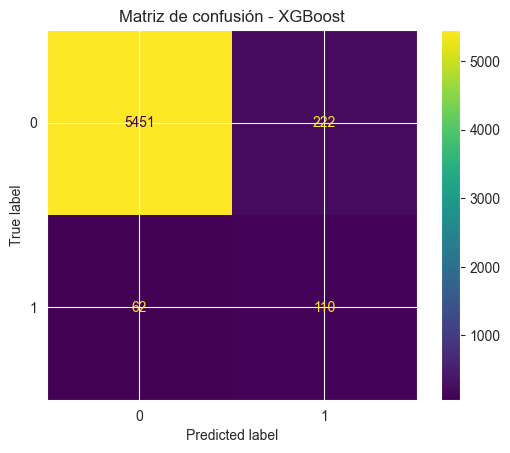

AUC-ROC (train): 0.9301
AUC-ROC (test) : 0.8851
PR-AUC  (train): 0.6083
PR-AUC  (test) : 0.5408
{'threshold': 0.08259058743715286, 'cal_precision_at_threshold': 0.33217993079584773, 'cal_recall_at_threshold': 0.7007299270072993, 'cal_fbeta_at_threshold': 0.573476702508678, 'sampler': None, 'ratio': None, 'model': 'XGBoost', 'best_iteration': 813, 'n_estimators_used': 814}
Best iteration:  254
[XGBoost] Accuracy train: 0.9601 | test: 0.9559
[XGBoost] Balanced Acc train: 0.8058 | test: 0.7940
[XGBoost] Precision(1): 0.3567 | Recall(1): 0.6221 | F1(1): 0.4534
[XGBoost] Confusion matrix (test):
[[5480  193]
 [  65  107]]


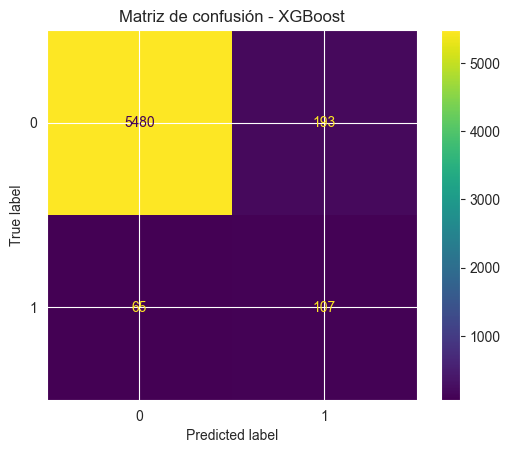

AUC-ROC (train): 0.9166
AUC-ROC (test) : 0.8887
PR-AUC  (train): 0.5680
PR-AUC  (test) : 0.5413
{'threshold': 0.130080446600914, 'cal_precision_at_threshold': 0.3643724696356275, 'cal_recall_at_threshold': 0.656934306569343, 'cal_fbeta_at_threshold': 0.5660377358487889, 'sampler': 'svm_smote', 'ratio': 0.05, 'model': 'XGBoost', 'best_iteration': 254, 'n_estimators_used': 255}
Best iteration:  433
[XGBoost] Accuracy train: 0.9668 | test: 0.9386
[XGBoost] Balanced Acc train: 0.7973 | test: 0.7541
[XGBoost] Precision(1): 0.2533 | Recall(1): 0.5581 | F1(1): 0.3485
[XGBoost] Confusion matrix (test):
[[5390  283]
 [  76   96]]


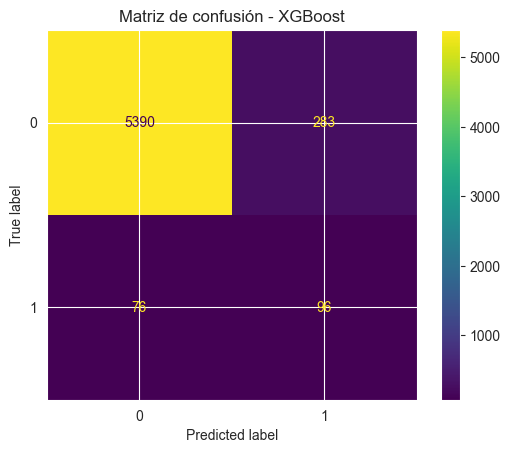

AUC-ROC (train): 0.9240
AUC-ROC (test) : 0.8804
PR-AUC  (train): 0.5978
PR-AUC  (test) : 0.4926
{'threshold': 0.21388889849185944, 'cal_precision_at_threshold': 0.3951219512195122, 'cal_recall_at_threshold': 0.5912408759124088, 'cal_fbeta_at_threshold': 0.5378486055774415, 'sampler': 'svm_smote', 'ratio': 0.1, 'model': 'XGBoost', 'best_iteration': 433, 'n_estimators_used': 434}
Best iteration:  467
[XGBoost] Accuracy train: 0.9615 | test: 0.8163
[XGBoost] Balanced Acc train: 0.8214 | test: 0.7926
[XGBoost] Precision(1): 0.1132 | Recall(1): 0.7674 | F1(1): 0.1973
[XGBoost] Confusion matrix (test):
[[4639 1034]
 [  40  132]]


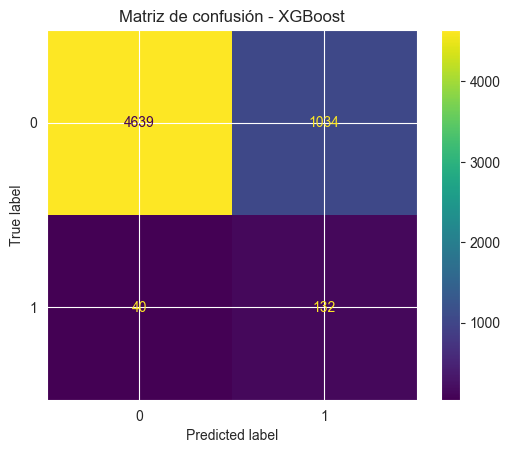

AUC-ROC (train): 0.9249
AUC-ROC (test) : 0.8697
PR-AUC  (train): 0.6022
PR-AUC  (test) : 0.4509
{'threshold': 0.17673496901988983, 'cal_precision_at_threshold': 0.36929460580912865, 'cal_recall_at_threshold': 0.6496350364963503, 'cal_fbeta_at_threshold': 0.5640050697082265, 'sampler': 'svm_smote', 'ratio': 0.15, 'model': 'XGBoost', 'best_iteration': 467, 'n_estimators_used': 468}
Best iteration:  516
[XGBoost] Accuracy train: 0.9625 | test: 0.7673
[XGBoost] Balanced Acc train: 0.8177 | test: 0.7646
[XGBoost] Precision(1): 0.0903 | Recall(1): 0.7616 | F1(1): 0.1615
[XGBoost] Confusion matrix (test):
[[4354 1319]
 [  41  131]]


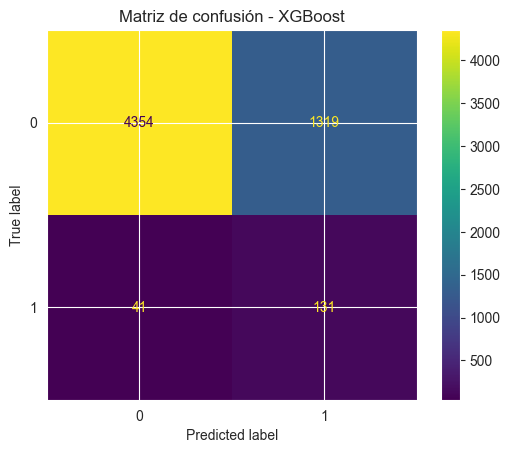

AUC-ROC (train): 0.9255
AUC-ROC (test) : 0.8594
PR-AUC  (train): 0.6050
PR-AUC  (test) : 0.4043
{'threshold': 0.18153756856918335, 'cal_precision_at_threshold': 0.3739130434782609, 'cal_recall_at_threshold': 0.6277372262773723, 'cal_fbeta_at_threshold': 0.5526992287915135, 'sampler': 'svm_smote', 'ratio': 0.2, 'model': 'XGBoost', 'best_iteration': 516, 'n_estimators_used': 517}
Best iteration:  355
[XGBoost] Accuracy train: 0.9664 | test: 0.9634
[XGBoost] Balanced Acc train: 0.8070 | test: 0.7613
[XGBoost] Precision(1): 0.4087 | Recall(1): 0.5465 | F1(1): 0.4677
[XGBoost] Confusion matrix (test):
[[5537  136]
 [  78   94]]


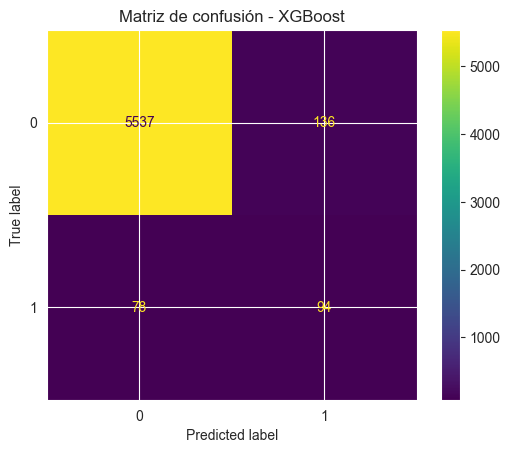

AUC-ROC (train): 0.9331
AUC-ROC (test) : 0.8830
PR-AUC  (train): 0.6120
PR-AUC  (test) : 0.5369
{'threshold': 0.20025557279586792, 'cal_precision_at_threshold': 0.4027777777777778, 'cal_recall_at_threshold': 0.635036496350365, 'cal_fbeta_at_threshold': 0.5693717277484375, 'sampler': 'ro', 'ratio': 0.05, 'model': 'XGBoost', 'best_iteration': 355, 'n_estimators_used': 356}
Best iteration:  260
[XGBoost] Accuracy train: 0.9681 | test: 0.9632
[XGBoost] Balanced Acc train: 0.8043 | test: 0.7696
[XGBoost] Precision(1): 0.4093 | Recall(1): 0.5640 | F1(1): 0.4743
[XGBoost] Confusion matrix (test):
[[5533  140]
 [  75   97]]


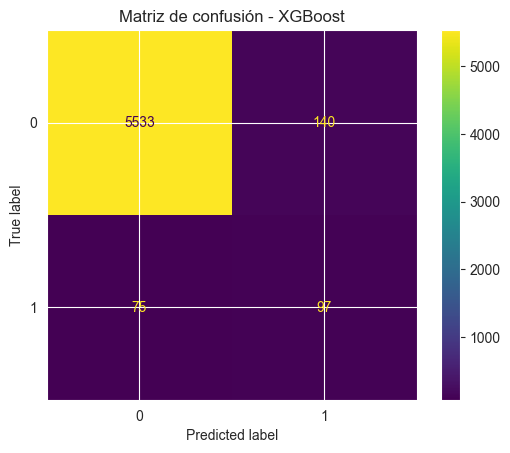

AUC-ROC (train): 0.9413
AUC-ROC (test) : 0.8839
PR-AUC  (train): 0.6206
PR-AUC  (test) : 0.5386
{'threshold': 0.3469374477863312, 'cal_precision_at_threshold': 0.43349753694581283, 'cal_recall_at_threshold': 0.6423357664233577, 'cal_fbeta_at_threshold': 0.5858854860183952, 'sampler': 'ro', 'ratio': 0.1, 'model': 'XGBoost', 'best_iteration': 260, 'n_estimators_used': 261}
Best iteration:  438
[XGBoost] Accuracy train: 0.9653 | test: 0.9583
[XGBoost] Balanced Acc train: 0.8445 | test: 0.7784
[XGBoost] Precision(1): 0.3686 | Recall(1): 0.5872 | F1(1): 0.4529
[XGBoost] Confusion matrix (test):
[[5500  173]
 [  71  101]]


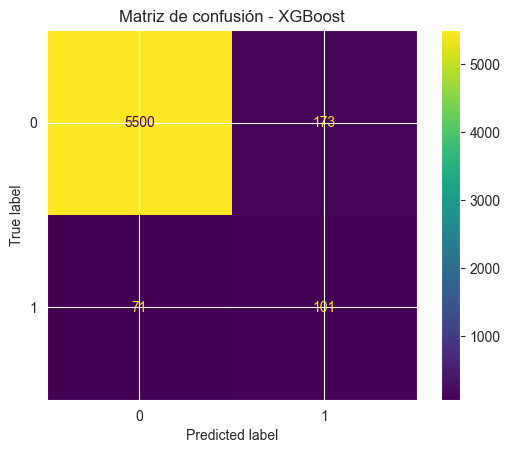

AUC-ROC (train): 0.9574
AUC-ROC (test) : 0.8807
PR-AUC  (train): 0.6763
PR-AUC  (test) : 0.5202
{'threshold': 0.3370565176010132, 'cal_precision_at_threshold': 0.38493723849372385, 'cal_recall_at_threshold': 0.6715328467153284, 'cal_fbeta_at_threshold': 0.5844980940276898, 'sampler': 'ro', 'ratio': 0.15, 'model': 'XGBoost', 'best_iteration': 438, 'n_estimators_used': 439}
Best iteration:  440
[XGBoost] Accuracy train: 0.9635 | test: 0.9550
[XGBoost] Balanced Acc train: 0.8598 | test: 0.7823
[XGBoost] Precision(1): 0.3468 | Recall(1): 0.5988 | F1(1): 0.4392
[XGBoost] Confusion matrix (test):
[[5479  194]
 [  69  103]]


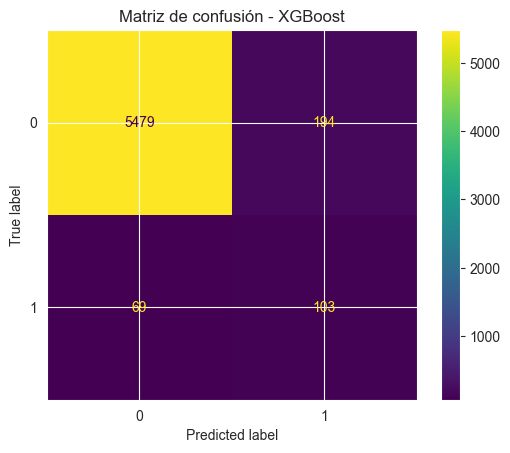

AUC-ROC (train): 0.9615
AUC-ROC (test) : 0.8776
PR-AUC  (train): 0.6885
PR-AUC  (test) : 0.5167
{'threshold': 0.3580078184604645, 'cal_precision_at_threshold': 0.372, 'cal_recall_at_threshold': 0.6788321167883211, 'cal_fbeta_at_threshold': 0.5827067669170242, 'sampler': 'ro', 'ratio': 0.2, 'model': 'XGBoost', 'best_iteration': 440, 'n_estimators_used': 441}
Best iteration:  467
[XGBoost] Accuracy train: 0.9555 | test: 0.9304
[XGBoost] Balanced Acc train: 0.8352 | test: 0.8006
[XGBoost] Precision(1): 0.2462 | Recall(1): 0.6628 | F1(1): 0.3591
[XGBoost] Confusion matrix (test):
[[5324  349]
 [  58  114]]


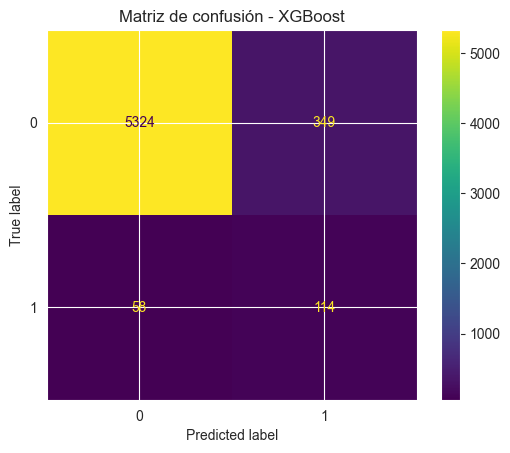

AUC-ROC (train): 0.9322
AUC-ROC (test) : 0.8841
PR-AUC  (train): 0.6122
PR-AUC  (test) : 0.5148
{'threshold': 0.13076867163181305, 'cal_precision_at_threshold': 0.34191176470588236, 'cal_recall_at_threshold': 0.6788321167883211, 'cal_fbeta_at_threshold': 0.5670731707314302, 'sampler': 'adasyn', 'ratio': 0.05, 'model': 'XGBoost', 'best_iteration': 467, 'n_estimators_used': 468}
Best iteration:  340
[XGBoost] Accuracy train: 0.9669 | test: 0.8703
[XGBoost] Balanced Acc train: 0.8009 | test: 0.7838
[XGBoost] Precision(1): 0.1444 | Recall(1): 0.6919 | F1(1): 0.2390
[XGBoost] Confusion matrix (test):
[[4968  705]
 [  53  119]]


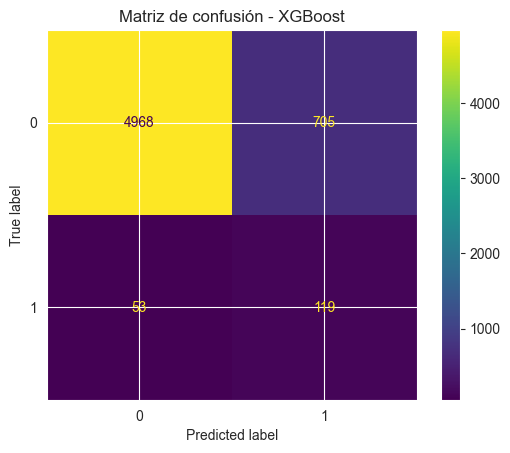

AUC-ROC (train): 0.9258
AUC-ROC (test) : 0.8703
PR-AUC  (train): 0.5876
PR-AUC  (test) : 0.4298
{'threshold': 0.21549725532531738, 'cal_precision_at_threshold': 0.42105263157894735, 'cal_recall_at_threshold': 0.6423357664233577, 'cal_fbeta_at_threshold': 0.5812417437249813, 'sampler': 'adasyn', 'ratio': 0.1, 'model': 'XGBoost', 'best_iteration': 340, 'n_estimators_used': 341}
Best iteration:  445
[XGBoost] Accuracy train: 0.9654 | test: 0.7870
[XGBoost] Balanced Acc train: 0.8178 | test: 0.7662
[XGBoost] Precision(1): 0.0963 | Recall(1): 0.7442 | F1(1): 0.1706
[XGBoost] Confusion matrix (test):
[[4472 1201]
 [  44  128]]


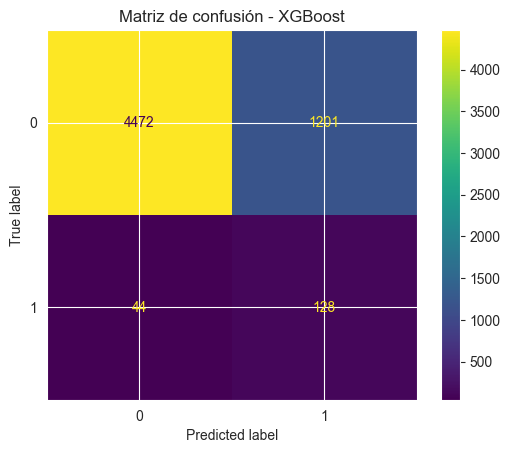

AUC-ROC (train): 0.9331
AUC-ROC (test) : 0.8503
PR-AUC  (train): 0.6058
PR-AUC  (test) : 0.2892
{'threshold': 0.19509130716323853, 'cal_precision_at_threshold': 0.4018264840182648, 'cal_recall_at_threshold': 0.6423357664233577, 'cal_fbeta_at_threshold': 0.5736636245108271, 'sampler': 'adasyn', 'ratio': 0.15, 'model': 'XGBoost', 'best_iteration': 445, 'n_estimators_used': 446}
Best iteration:  337
[XGBoost] Accuracy train: 0.9614 | test: 0.7352
[XGBoost] Balanced Acc train: 0.8136 | test: 0.7621
[XGBoost] Precision(1): 0.0825 | Recall(1): 0.7907 | F1(1): 0.1495
[XGBoost] Confusion matrix (test):
[[4161 1512]
 [  36  136]]


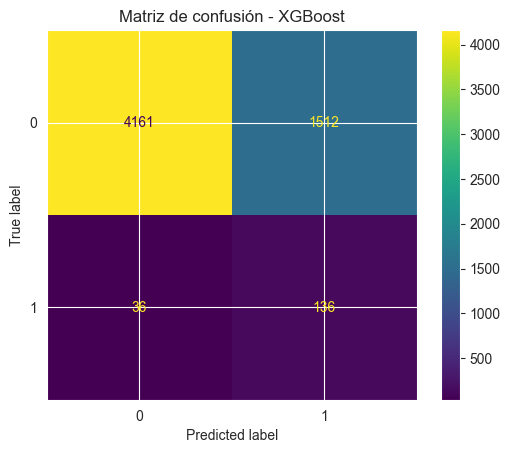

AUC-ROC (train): 0.9232
AUC-ROC (test) : 0.8493
PR-AUC  (train): 0.5732
PR-AUC  (test) : 0.3356
{'threshold': 0.19745303690433502, 'cal_precision_at_threshold': 0.38396624472573837, 'cal_recall_at_threshold': 0.6642335766423357, 'cal_fbeta_at_threshold': 0.579617834394641, 'sampler': 'adasyn', 'ratio': 0.2, 'model': 'XGBoost', 'best_iteration': 337, 'n_estimators_used': 338}
Best iteration:  417
[XGBoost] Accuracy train: 0.9592 | test: 0.9423
[XGBoost] Balanced Acc train: 0.8251 | test: 0.7927
[XGBoost] Precision(1): 0.2846 | Recall(1): 0.6337 | F1(1): 0.3928
[XGBoost] Confusion matrix (test):
[[5399  274]
 [  63  109]]


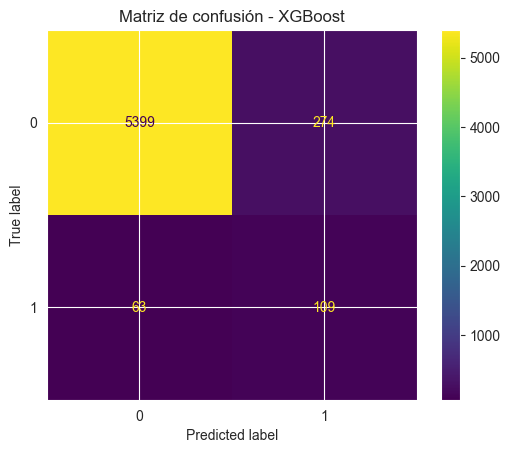

AUC-ROC (train): 0.9309
AUC-ROC (test) : 0.8813
PR-AUC  (train): 0.6032
PR-AUC  (test) : 0.5268
{'threshold': 0.1392194777727127, 'cal_precision_at_threshold': 0.3488372093023256, 'cal_recall_at_threshold': 0.656934306569343, 'cal_fbeta_at_threshold': 0.5583126550865765, 'sampler': 'smote', 'ratio': 0.05, 'model': 'XGBoost', 'best_iteration': 417, 'n_estimators_used': 418}
Best iteration:  815
[XGBoost] Accuracy train: 0.9651 | test: 0.9138
[XGBoost] Balanced Acc train: 0.8324 | test: 0.7808
[XGBoost] Precision(1): 0.1993 | Recall(1): 0.6395 | F1(1): 0.3039
[XGBoost] Confusion matrix (test):
[[5231  442]
 [  62  110]]


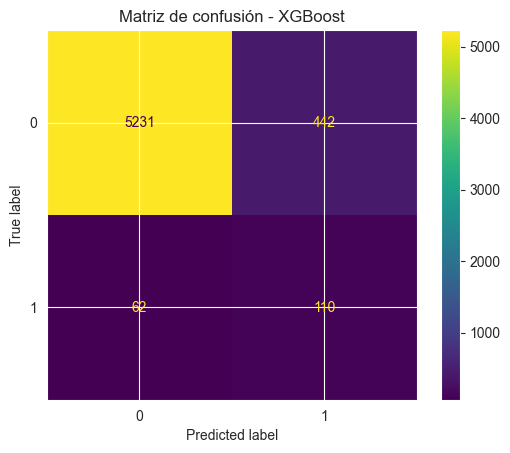

AUC-ROC (train): 0.9440
AUC-ROC (test) : 0.8760
PR-AUC  (train): 0.6470
PR-AUC  (test) : 0.4799
{'threshold': 0.16852059960365295, 'cal_precision_at_threshold': 0.3852813852813853, 'cal_recall_at_threshold': 0.6496350364963503, 'cal_fbeta_at_threshold': 0.5712451861358111, 'sampler': 'smote', 'ratio': 0.1, 'model': 'XGBoost', 'best_iteration': 815, 'n_estimators_used': 816}
Best iteration:  325
[XGBoost] Accuracy train: 0.9628 | test: 0.7701
[XGBoost] Balanced Acc train: 0.8086 | test: 0.7547
[XGBoost] Precision(1): 0.0891 | Recall(1): 0.7384 | F1(1): 0.1589
[XGBoost] Confusion matrix (test):
[[4374 1299]
 [  45  127]]


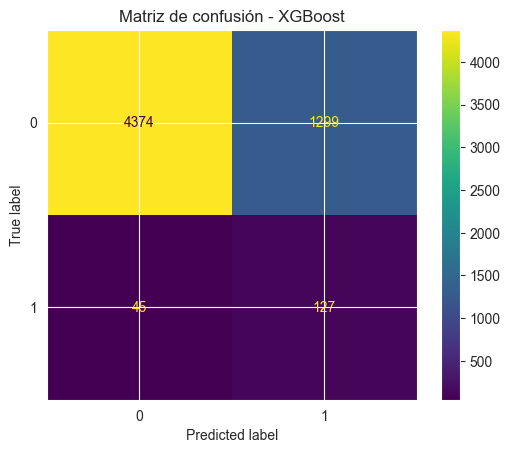

AUC-ROC (train): 0.9246
AUC-ROC (test) : 0.8329
PR-AUC  (train): 0.5815
PR-AUC  (test) : 0.2913
{'threshold': 0.1954747587442398, 'cal_precision_at_threshold': 0.39737991266375544, 'cal_recall_at_threshold': 0.6642335766423357, 'cal_fbeta_at_threshold': 0.5855855855853257, 'sampler': 'smote', 'ratio': 0.15, 'model': 'XGBoost', 'best_iteration': 325, 'n_estimators_used': 326}
Best iteration:  433
[XGBoost] Accuracy train: 0.9669 | test: 0.7321
[XGBoost] Balanced Acc train: 0.8079 | test: 0.7520
[XGBoost] Precision(1): 0.0801 | Recall(1): 0.7733 | F1(1): 0.1452
[XGBoost] Confusion matrix (test):
[[4146 1527]
 [  39  133]]


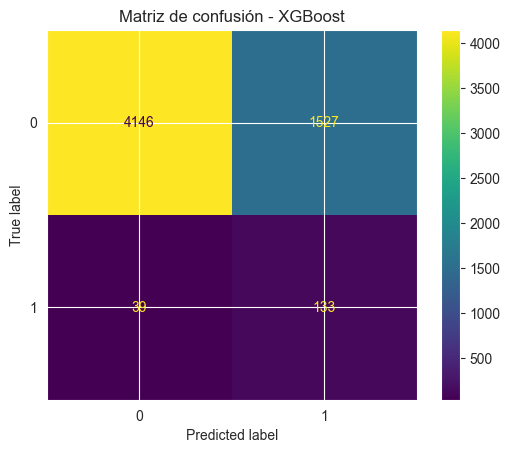

AUC-ROC (train): 0.9322
AUC-ROC (test) : 0.8420
PR-AUC  (train): 0.6012
PR-AUC  (test) : 0.2917
{'threshold': 0.22268046438694, 'cal_precision_at_threshold': 0.42105263157894735, 'cal_recall_at_threshold': 0.6423357664233577, 'cal_fbeta_at_threshold': 0.5812417437249813, 'sampler': 'smote', 'ratio': 0.2, 'model': 'XGBoost', 'best_iteration': 433, 'n_estimators_used': 434}
Best iteration:  425
[XGBoost] Accuracy train: 0.9647 | test: 0.9576
[XGBoost] Balanced Acc train: 0.8110 | test: 0.7836
[XGBoost] Precision(1): 0.3652 | Recall(1): 0.5988 | F1(1): 0.4537
[XGBoost] Confusion matrix (test):
[[5494  179]
 [  69  103]]


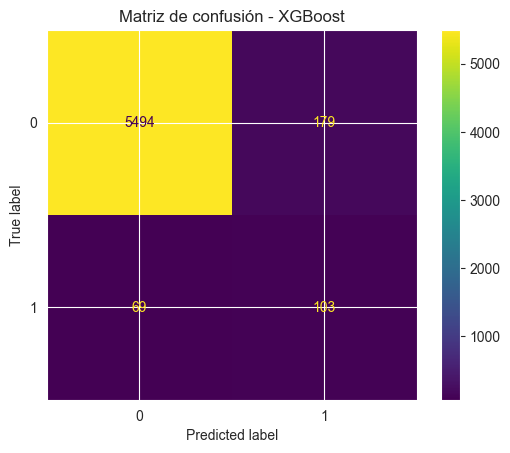

AUC-ROC (train): 0.9276
AUC-ROC (test) : 0.8891
PR-AUC  (train): 0.6028
PR-AUC  (test) : 0.5298
{'threshold': 0.16502507030963898, 'cal_precision_at_threshold': 0.3963963963963964, 'cal_recall_at_threshold': 0.6423357664233577, 'cal_fbeta_at_threshold': 0.5714285714283149, 'sampler': 'b_smote', 'ratio': 0.05, 'model': 'XGBoost', 'best_iteration': 425, 'n_estimators_used': 426}
Best iteration:  848
[XGBoost] Accuracy train: 0.9565 | test: 0.8828
[XGBoost] Balanced Acc train: 0.8512 | test: 0.7874
[XGBoost] Precision(1): 0.1575 | Recall(1): 0.6860 | F1(1): 0.2562
[XGBoost] Confusion matrix (test):
[[5042  631]
 [  54  118]]


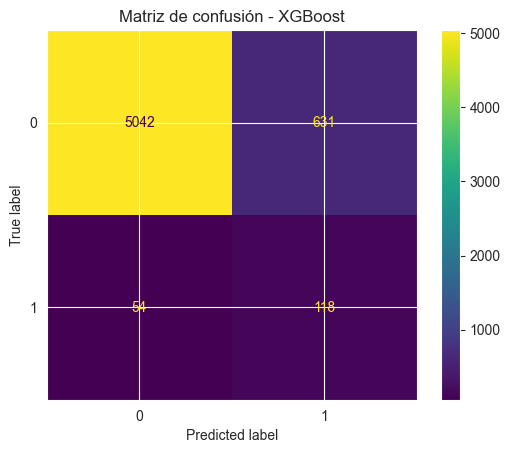

AUC-ROC (train): 0.9349
AUC-ROC (test) : 0.8720
PR-AUC  (train): 0.6402
PR-AUC  (test) : 0.4798
{'threshold': 0.1332777440547943, 'cal_precision_at_threshold': 0.3345323741007194, 'cal_recall_at_threshold': 0.6788321167883211, 'cal_fbeta_at_threshold': 0.5629539951571058, 'sampler': 'b_smote', 'ratio': 0.1, 'model': 'XGBoost', 'best_iteration': 848, 'n_estimators_used': 849}
Best iteration:  414
[XGBoost] Accuracy train: 0.9579 | test: 0.7504
[XGBoost] Balanced Acc train: 0.8181 | test: 0.7643
[XGBoost] Precision(1): 0.0862 | Recall(1): 0.7791 | F1(1): 0.1552
[XGBoost] Confusion matrix (test):
[[4252 1421]
 [  38  134]]


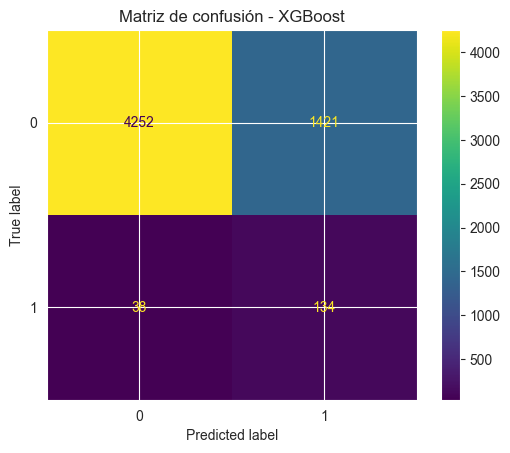

AUC-ROC (train): 0.9169
AUC-ROC (test) : 0.8513
PR-AUC  (train): 0.5861
PR-AUC  (test) : 0.3888
{'threshold': 0.1642187237739563, 'cal_precision_at_threshold': 0.36220472440944884, 'cal_recall_at_threshold': 0.6715328467153284, 'cal_fbeta_at_threshold': 0.5735660847877593, 'sampler': 'b_smote', 'ratio': 0.15, 'model': 'XGBoost', 'best_iteration': 414, 'n_estimators_used': 415}
Best iteration:  463
[XGBoost] Accuracy train: 0.9595 | test: 0.7711
[XGBoost] Balanced Acc train: 0.8182 | test: 0.7721
[XGBoost] Precision(1): 0.0929 | Recall(1): 0.7733 | F1(1): 0.1658
[XGBoost] Confusion matrix (test):
[[4374 1299]
 [  39  133]]


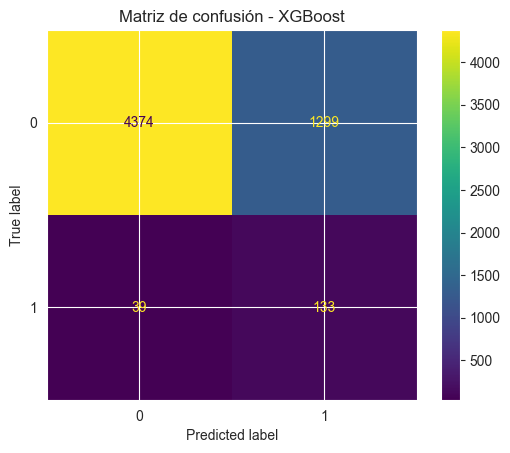

AUC-ROC (train): 0.9185
AUC-ROC (test) : 0.8533
PR-AUC  (train): 0.5877
PR-AUC  (test) : 0.3647
{'threshold': 0.1810607612133026, 'cal_precision_at_threshold': 0.36666666666666664, 'cal_recall_at_threshold': 0.6423357664233577, 'cal_fbeta_at_threshold': 0.5583756345175017, 'sampler': 'b_smote', 'ratio': 0.2, 'model': 'XGBoost', 'best_iteration': 463, 'n_estimators_used': 464}


In [11]:
from src.model_utils.mod_evaluation import run_model_and_evaluate_xgb


# Los mejores parámetros para XGBoost

xgb_params = {
    "colsample_bytree": 0.7,
    "subsample": 0.8,
    "gamma": 1.0,
    "max_depth": 5,
    "min_child_weight": 12,
    "reg_alpha": 2,
    "reg_lambda": 3.0,
    "learning_rate": 0.03,
    "n_estimators": 2000,
    "scale_pos_weight": 1
}

# Ejecutamos el modelo XGBoost  con los mejores parámetros y obtenemos las métricas, guardamos los resultados para
# todas las ejecuciones con diferentes samplers y diferentes ratios.

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "svm_smote", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "svm_smote", 0.1
            )
results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})
rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "svm_smote", 0.15
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "svm_smote", 0.2
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})
rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "ro", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "ro", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "ro", 0.15
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "ro", 0.2
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})


rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "adasyn", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "adasyn", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "adasyn", 0.15
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "adasyn", 0.2
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "smote", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "smote", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "smote", 0.15
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "smote", 0.2
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "b_smote", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "b_smote", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "b_smote", 0.15
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate_xgb(
                X_train, y_train,
                X_test, y_test, xgb_params, "b_smote", 0.2
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

Ejecutamos el modelo LigthGBM con los mejores ratios

[LigthGBM] Accuracy train: 0.9959 | test: 0.9475
[LigthGBM] Balanced Acc train: 0.9979 | test: 0.7474
[LigthGBM] Precision(1): 0.2884 | Recall(1): 0.5349 | F1(1): 0.3747
[LigthGBM] Confusion matrix (test):
[[5446  227]
 [  80   92]]


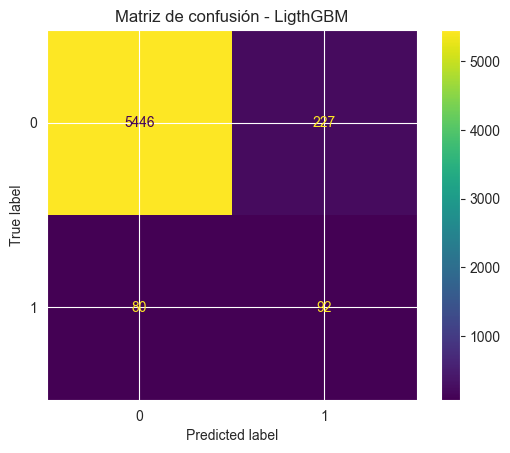

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8635
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.4595
[LigthGBM] Accuracy train: 0.9950 | test: 0.8994
[LigthGBM] Balanced Acc train: 0.9974 | test: 0.7593
[LigthGBM] Precision(1): 0.1677 | Recall(1): 0.6105 | F1(1): 0.2632
[LigthGBM] Confusion matrix (test):
[[5152  521]
 [  67  105]]


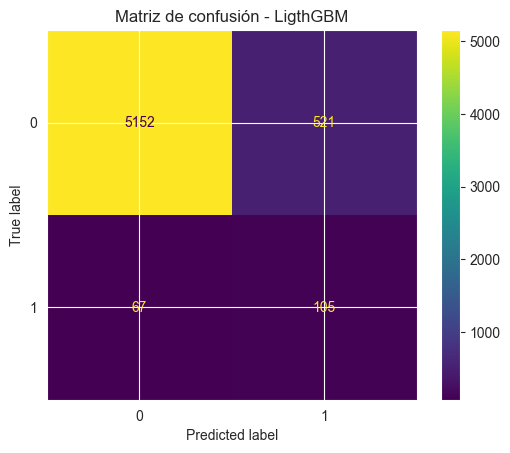

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8590
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.4280
[LigthGBM] Accuracy train: 0.9909 | test: 0.6885
[LigthGBM] Balanced Acc train: 0.9953 | test: 0.7408
[LigthGBM] Precision(1): 0.0712 | Recall(1): 0.7965 | F1(1): 0.1308
[LigthGBM] Confusion matrix (test):
[[3887 1786]
 [  35  137]]


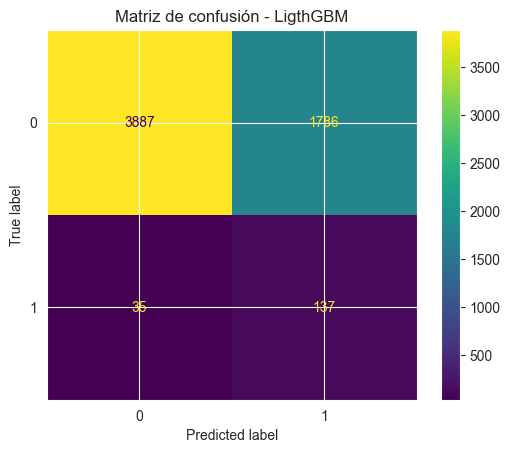

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8301
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.3247
[LigthGBM] Accuracy train: 0.9935 | test: 0.6115
[LigthGBM] Balanced Acc train: 0.9967 | test: 0.7266
[LigthGBM] Precision(1): 0.0611 | Recall(1): 0.8488 | F1(1): 0.1139
[LigthGBM] Confusion matrix (test):
[[3428 2245]
 [  26  146]]


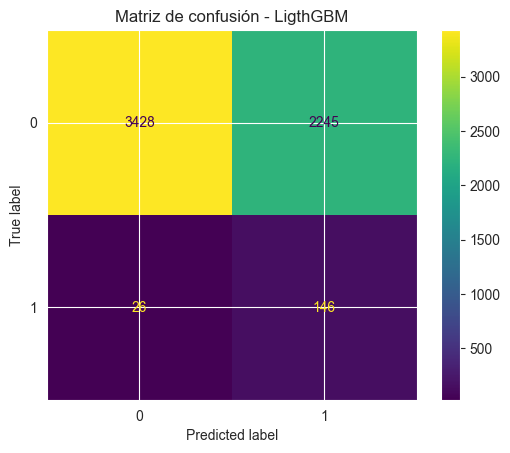

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8485
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.4200
[LigthGBM] Accuracy train: 0.9950 | test: 0.5311
[LigthGBM] Balanced Acc train: 0.9974 | test: 0.7077
[LigthGBM] Precision(1): 0.0535 | Recall(1): 0.8953 | F1(1): 0.1010
[LigthGBM] Confusion matrix (test):
[[2950 2723]
 [  18  154]]


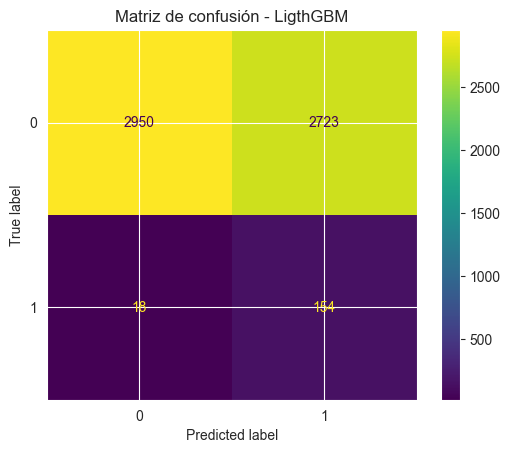

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8249
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.3436
[LigthGBM] Accuracy train: 0.9886 | test: 0.9283
[LigthGBM] Balanced Acc train: 0.9941 | test: 0.7686
[LigthGBM] Precision(1): 0.2274 | Recall(1): 0.5988 | F1(1): 0.3296
[LigthGBM] Confusion matrix (test):
[[5323  350]
 [  69  103]]


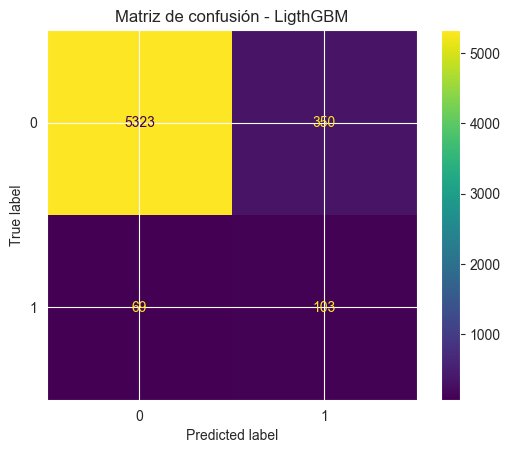

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8629
PR-AUC  (train): 0.9999
PR-AUC  (test) : 0.4497
[LigthGBM] Accuracy train: 0.9981 | test: 0.9524
[LigthGBM] Balanced Acc train: 0.9990 | test: 0.7528
[LigthGBM] Precision(1): 0.3185 | Recall(1): 0.5407 | F1(1): 0.4009
[LigthGBM] Confusion matrix (test):
[[5474  199]
 [  79   93]]


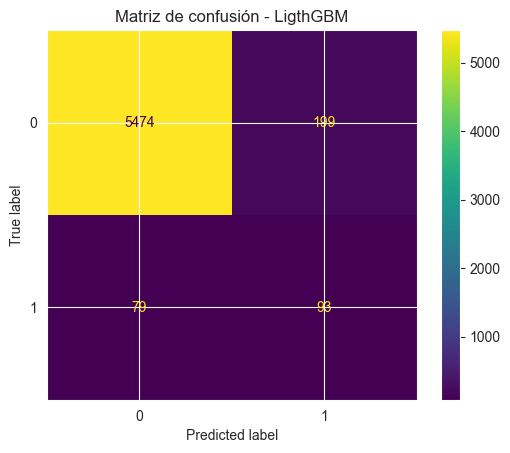

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8657
PR-AUC  (train): 0.9998
PR-AUC  (test) : 0.4685
[LigthGBM] Accuracy train: 0.9980 | test: 0.9528
[LigthGBM] Balanced Acc train: 0.9990 | test: 0.7473
[LigthGBM] Precision(1): 0.3182 | Recall(1): 0.5291 | F1(1): 0.3974
[LigthGBM] Confusion matrix (test):
[[5478  195]
 [  81   91]]


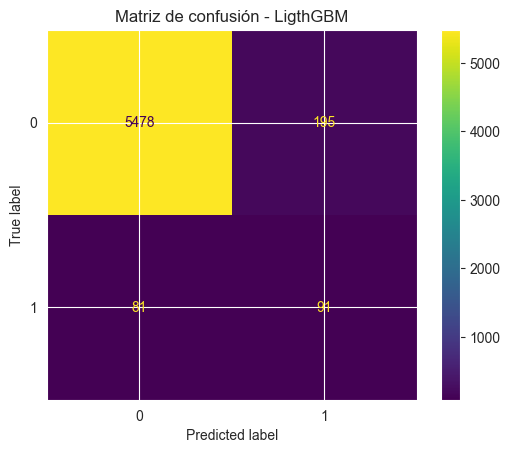

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8658
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.4753
[LigthGBM] Accuracy train: 0.9961 | test: 0.9439
[LigthGBM] Balanced Acc train: 0.9980 | test: 0.7625
[LigthGBM] Precision(1): 0.2784 | Recall(1): 0.5698 | F1(1): 0.3740
[LigthGBM] Confusion matrix (test):
[[5419  254]
 [  74   98]]


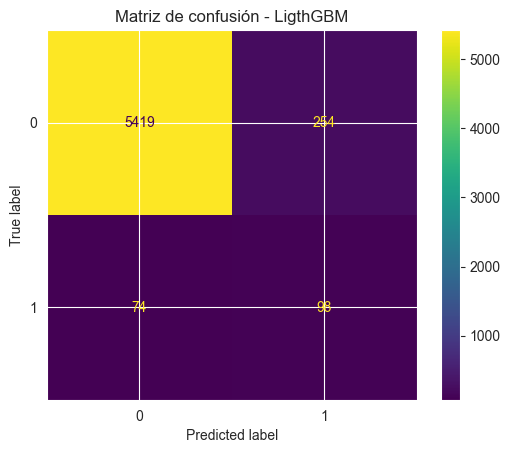

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8645
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.4709
[LigthGBM] Accuracy train: 0.9860 | test: 0.8092
[LigthGBM] Balanced Acc train: 0.9928 | test: 0.7608
[LigthGBM] Precision(1): 0.1028 | Recall(1): 0.7093 | F1(1): 0.1795
[LigthGBM] Confusion matrix (test):
[[4608 1065]
 [  50  122]]


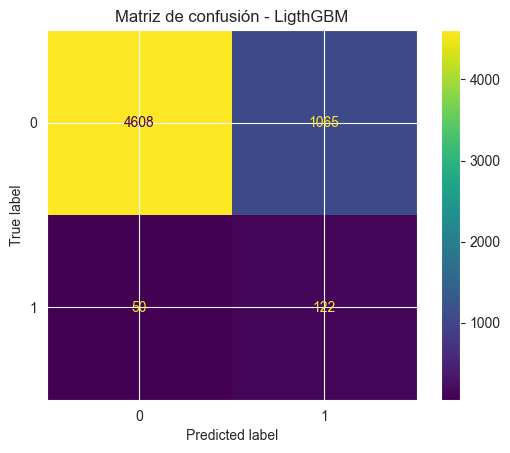

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8537
PR-AUC  (train): 0.9999
PR-AUC  (test) : 0.4145
[LigthGBM] Accuracy train: 0.9979 | test: 0.7139
[LigthGBM] Balanced Acc train: 0.9989 | test: 0.7540
[LigthGBM] Precision(1): 0.0772 | Recall(1): 0.7965 | F1(1): 0.1408
[LigthGBM] Confusion matrix (test):
[[4036 1637]
 [  35  137]]


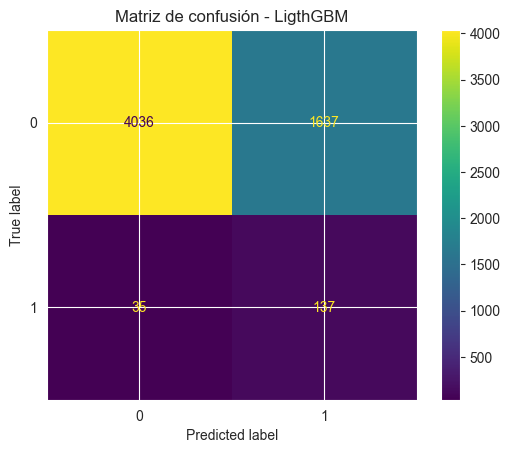

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8432
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.3844
[LigthGBM] Accuracy train: 0.9875 | test: 0.4525
[LigthGBM] Balanced Acc train: 0.9936 | test: 0.6785
[LigthGBM] Precision(1): 0.0472 | Recall(1): 0.9186 | F1(1): 0.0899
[LigthGBM] Confusion matrix (test):
[[2487 3186]
 [  14  158]]


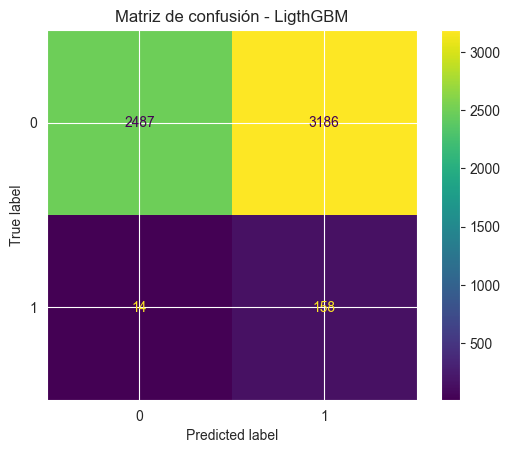

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8313
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.2932
[LigthGBM] Accuracy train: 0.9973 | test: 0.4508
[LigthGBM] Balanced Acc train: 0.9986 | test: 0.6663
[LigthGBM] Precision(1): 0.0460 | Recall(1): 0.8953 | F1(1): 0.0875
[LigthGBM] Confusion matrix (test):
[[2481 3192]
 [  18  154]]


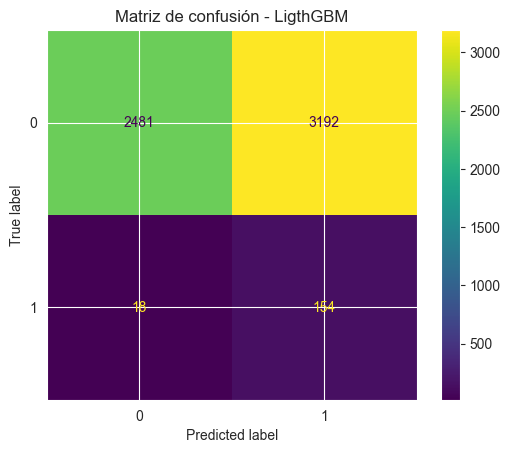

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8198
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.2634
[LigthGBM] Accuracy train: 0.9842 | test: 0.7466
[LigthGBM] Balanced Acc train: 0.9918 | test: 0.7567
[LigthGBM] Precision(1): 0.0839 | Recall(1): 0.7674 | F1(1): 0.1513
[LigthGBM] Confusion matrix (test):
[[4232 1441]
 [  40  132]]


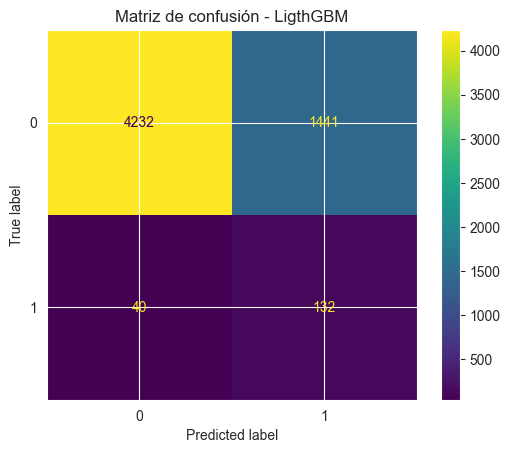

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8339
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.3721
[LigthGBM] Accuracy train: 0.9920 | test: 0.4766
[LigthGBM] Balanced Acc train: 0.9959 | test: 0.6797
[LigthGBM] Precision(1): 0.0482 | Recall(1): 0.8953 | F1(1): 0.0915
[LigthGBM] Confusion matrix (test):
[[2632 3041]
 [  18  154]]


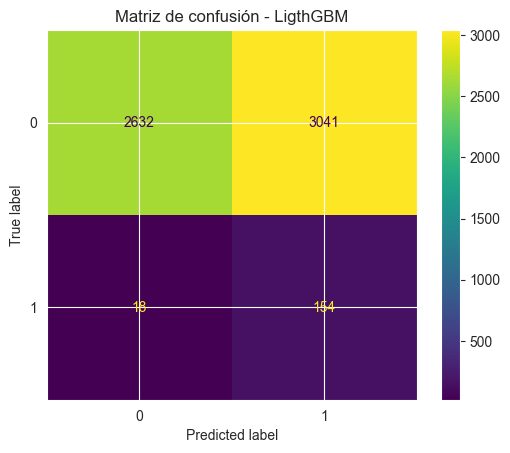

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8352
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.3585
[LigthGBM] Accuracy train: 0.9925 | test: 0.2915
[LigthGBM] Balanced Acc train: 0.9961 | test: 0.6097
[LigthGBM] Precision(1): 0.0380 | Recall(1): 0.9477 | F1(1): 0.0730
[LigthGBM] Confusion matrix (test):
[[1541 4132]
 [   9  163]]


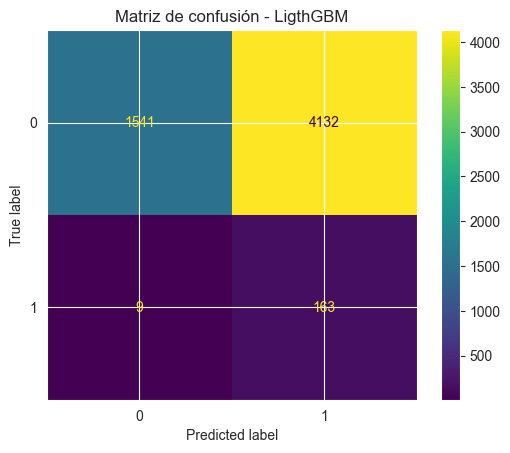

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8215
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.3177
[LigthGBM] Accuracy train: 0.9904 | test: 0.2166
[LigthGBM] Balanced Acc train: 0.9951 | test: 0.5908
[LigthGBM] Precision(1): 0.0358 | Recall(1): 0.9884 | F1(1): 0.0691
[LigthGBM] Confusion matrix (test):
[[1096 4577]
 [   2  170]]


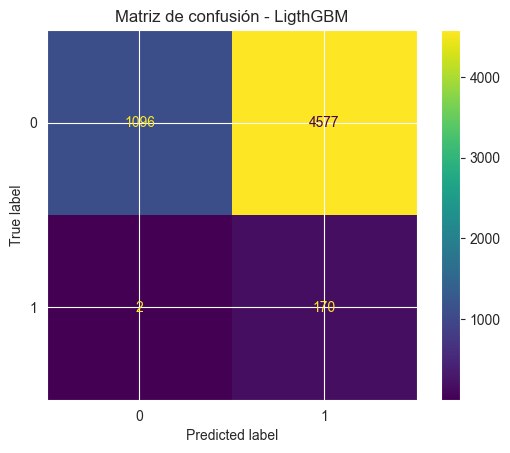

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8128
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.2583
[LigthGBM] Accuracy train: 0.9920 | test: 0.6659
[LigthGBM] Balanced Acc train: 0.9959 | test: 0.7405
[LigthGBM] Precision(1): 0.0683 | Recall(1): 0.8198 | F1(1): 0.1262
[LigthGBM] Confusion matrix (test):
[[3751 1922]
 [  31  141]]


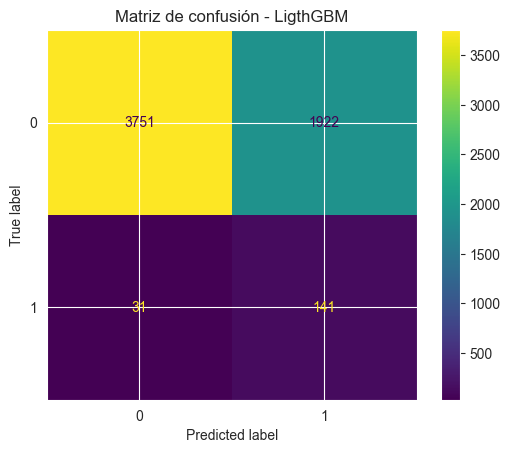

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8324
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.3205
[LigthGBM] Accuracy train: 0.9913 | test: 0.3625
[LigthGBM] Balanced Acc train: 0.9955 | test: 0.6378
[LigthGBM] Precision(1): 0.0413 | Recall(1): 0.9302 | F1(1): 0.0791
[LigthGBM] Confusion matrix (test):
[[1959 3714]
 [  12  160]]


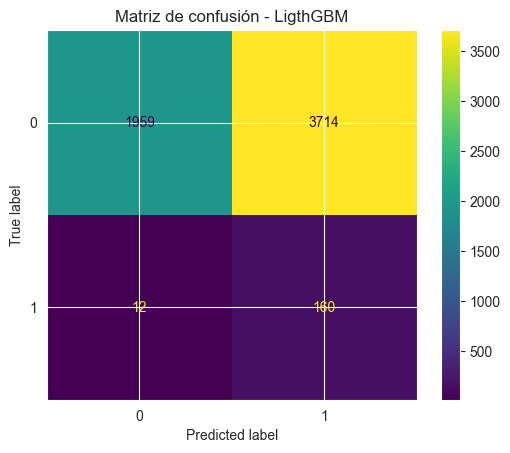

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8156
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.2912
[LigthGBM] Accuracy train: 0.9971 | test: 0.3620
[LigthGBM] Balanced Acc train: 0.9985 | test: 0.6319
[LigthGBM] Precision(1): 0.0408 | Recall(1): 0.9186 | F1(1): 0.0781
[LigthGBM] Confusion matrix (test):
[[1958 3715]
 [  14  158]]


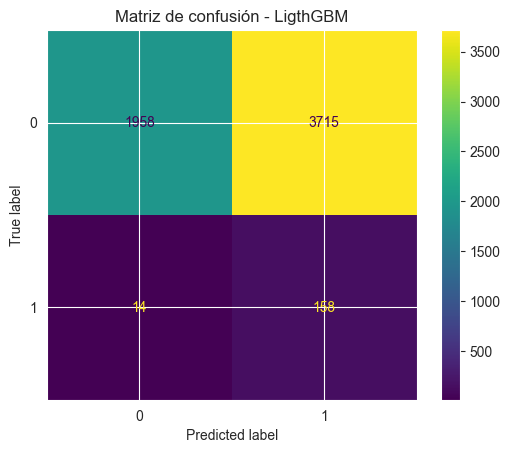

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.8057
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.2750
[LigthGBM] Accuracy train: 0.9988 | test: 0.3497
[LigthGBM] Balanced Acc train: 0.9994 | test: 0.6396
[LigthGBM] Precision(1): 0.0412 | Recall(1): 0.9477 | F1(1): 0.0790
[LigthGBM] Confusion matrix (test):
[[1881 3792]
 [   9  163]]


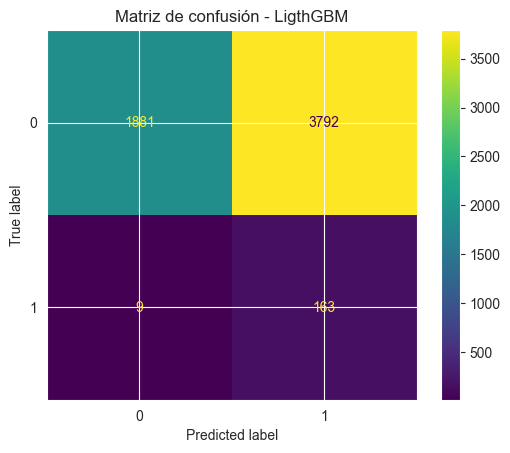

AUC-ROC (train): 1.0000
AUC-ROC (test) : 0.7986
PR-AUC  (train): 1.0000
PR-AUC  (test) : 0.2234


In [14]:
from src.model_utils.mod_evaluation import run_model_and_evaluate
from lightgbm import LGBMClassifier

# Configuramos scale_pos_weight
spw = (y_train == 0).sum() / (y_train == 1).sum()

# Creamos el diccionario con los mejores parámetros y creamos el modelo
best_params = {
    "colsample_bytree": 0.9,
    "learning_rate": 0.03,
    "max_depth": -1,
    "min_child_samples": 140,
    "min_split_gain": 0.1,
    "n_estimators": 1200,
    "num_leaves": 127,
    "reg_lambda": 5.0,
    "subsample": 0.55,
}

model = LGBMClassifier(
    objective="binary",
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=spw,
    verbosity=-1,
    **best_params
)

# Ejecutamos el modelo LightGBM con los mejores parámetros y obtenemos las métricas, guardamos los resultados para
# todas las ejecuciones con diferentes samplers y diferentes ratios.

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "svm_smote", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "svm_smote", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "svm_smote", 0.15
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "svm_smote", 0.2
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "ro", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "ro", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "ro", 0.15
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "ro", 0.2
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "b_smote", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "b_smote", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "b_smote", 0.15
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "b_smote", 0.2
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "smote", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "smote", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "smote", 0.15
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "smote", 0.2
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "adasyn", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "adasyn", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "adasyn", 0.15
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'LigthGBM',model, "adasyn", 0.2
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

Ejecutamos el modelo CatBoost con los mejores parámetros

[CatBoost] Accuracy train: 0.9728 | test: 0.9398
[CatBoost] Balanced Acc train: 0.8244 | test: 0.7576
[CatBoost] Precision(1): 0.2594 | Recall(1): 0.5640 | F1(1): 0.3553
[CatBoost] Confusion matrix (test):
[[5396  277]
 [  75   97]]


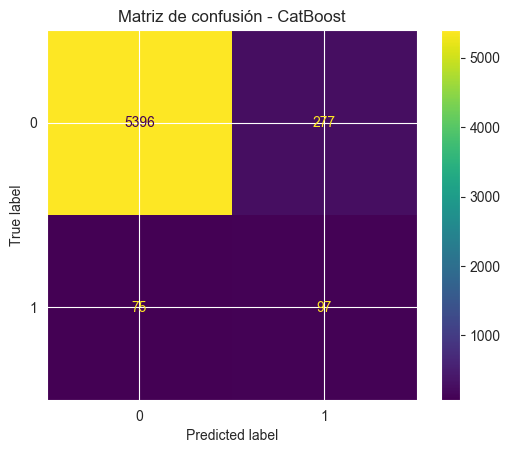

AUC-ROC (train): 0.9380
AUC-ROC (test) : 0.8735
PR-AUC  (train): 0.6918
PR-AUC  (test) : 0.4439
[CatBoost] Accuracy train: 0.9598 | test: 0.8173
[CatBoost] Balanced Acc train: 0.8332 | test: 0.7818
[CatBoost] Precision(1): 0.1111 | Recall(1): 0.7442 | F1(1): 0.1934
[CatBoost] Confusion matrix (test):
[[4649 1024]
 [  44  128]]


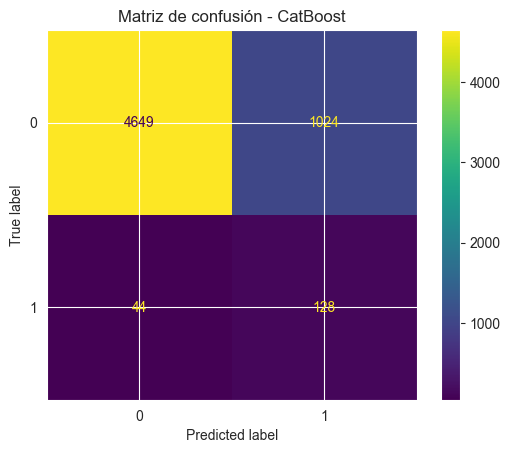

AUC-ROC (train): 0.9317
AUC-ROC (test) : 0.8526
PR-AUC  (train): 0.6639
PR-AUC  (test) : 0.4365
[CatBoost] Accuracy train: 0.9588 | test: 0.4987
[CatBoost] Balanced Acc train: 0.8327 | test: 0.6910
[CatBoost] Precision(1): 0.0502 | Recall(1): 0.8953 | F1(1): 0.0951
[CatBoost] Confusion matrix (test):
[[2761 2912]
 [  18  154]]


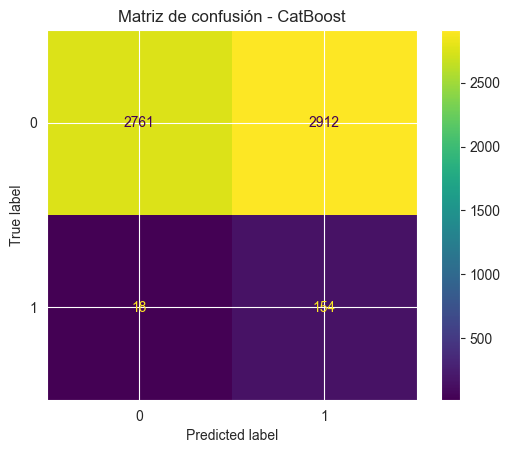

AUC-ROC (train): 0.9269
AUC-ROC (test) : 0.8502
PR-AUC  (train): 0.6395
PR-AUC  (test) : 0.4203
[CatBoost] Accuracy train: 0.9529 | test: 0.3304
[CatBoost] Balanced Acc train: 0.8409 | test: 0.6297
[CatBoost] Precision(1): 0.0401 | Recall(1): 0.9477 | F1(1): 0.0769
[CatBoost] Confusion matrix (test):
[[1768 3905]
 [   9  163]]


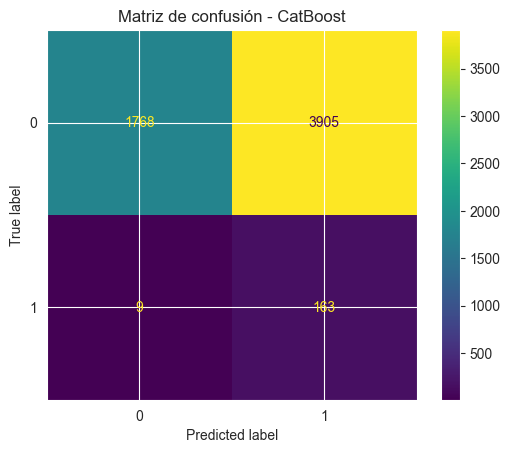

AUC-ROC (train): 0.9287
AUC-ROC (test) : 0.8382
PR-AUC  (train): 0.6372
PR-AUC  (test) : 0.3909
[CatBoost] Accuracy train: 0.9548 | test: 0.3187
[CatBoost] Balanced Acc train: 0.8327 | test: 0.6152
[CatBoost] Precision(1): 0.0387 | Recall(1): 0.9302 | F1(1): 0.0744
[CatBoost] Confusion matrix (test):
[[1703 3970]
 [  12  160]]


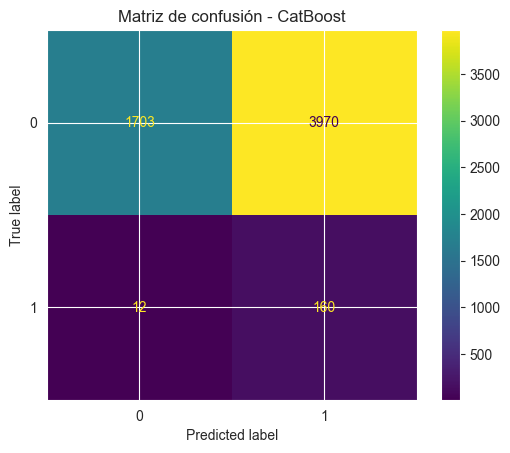

AUC-ROC (train): 0.9286
AUC-ROC (test) : 0.8175
PR-AUC  (train): 0.6273
PR-AUC  (test) : 0.3711
[CatBoost] Accuracy train: 0.9727 | test: 0.9492
[CatBoost] Balanced Acc train: 0.8300 | test: 0.7652
[CatBoost] Precision(1): 0.3053 | Recall(1): 0.5698 | F1(1): 0.3976
[CatBoost] Confusion matrix (test):
[[5450  223]
 [  74   98]]


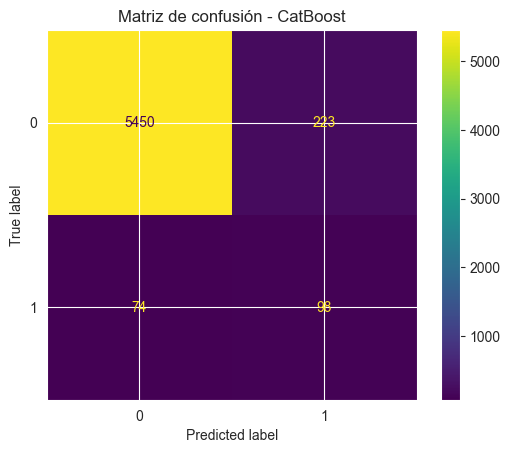

AUC-ROC (train): 0.9412
AUC-ROC (test) : 0.8787
PR-AUC  (train): 0.6959
PR-AUC  (test) : 0.4856
[CatBoost] Accuracy train: 0.9668 | test: 0.9372
[CatBoost] Balanced Acc train: 0.8502 | test: 0.7760
[CatBoost] Precision(1): 0.2581 | Recall(1): 0.6047 | F1(1): 0.3617
[CatBoost] Confusion matrix (test):
[[5374  299]
 [  68  104]]


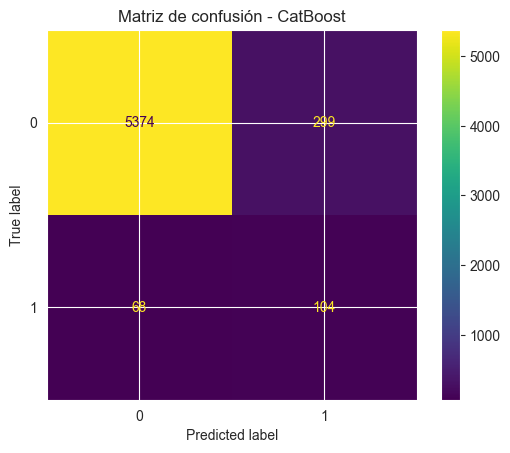

AUC-ROC (train): 0.9534
AUC-ROC (test) : 0.8745
PR-AUC  (train): 0.7126
PR-AUC  (test) : 0.4803
[CatBoost] Accuracy train: 0.9685 | test: 0.9507
[CatBoost] Balanced Acc train: 0.8546 | test: 0.7745
[CatBoost] Precision(1): 0.3176 | Recall(1): 0.5872 | F1(1): 0.4122
[CatBoost] Confusion matrix (test):
[[5456  217]
 [  71  101]]


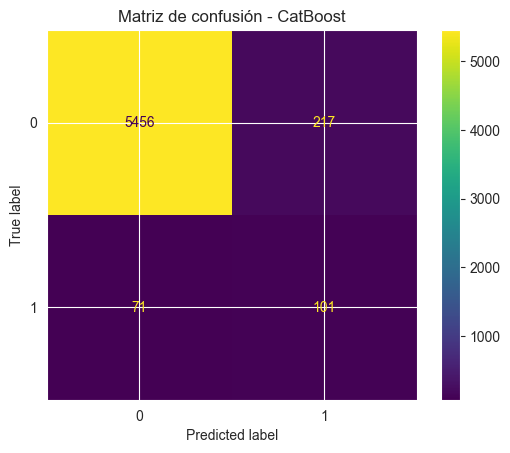

AUC-ROC (train): 0.9550
AUC-ROC (test) : 0.8766
PR-AUC  (train): 0.7041
PR-AUC  (test) : 0.5077
[CatBoost] Accuracy train: 0.9624 | test: 0.9381
[CatBoost] Balanced Acc train: 0.8698 | test: 0.7905
[CatBoost] Precision(1): 0.2672 | Recall(1): 0.6337 | F1(1): 0.3759
[CatBoost] Confusion matrix (test):
[[5374  299]
 [  63  109]]


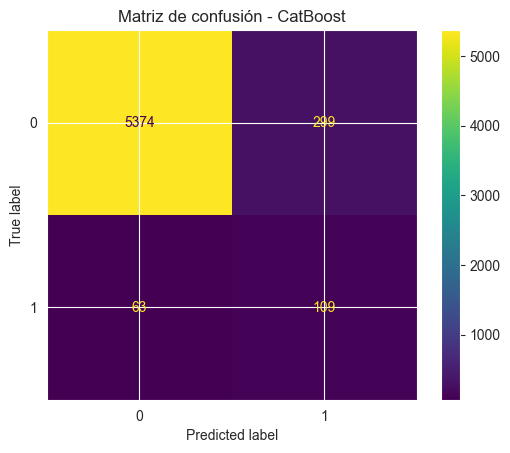

AUC-ROC (train): 0.9601
AUC-ROC (test) : 0.8747
PR-AUC  (train): 0.7067
PR-AUC  (test) : 0.4873
[CatBoost] Accuracy train: 0.9614 | test: 0.7504
[CatBoost] Balanced Acc train: 0.8270 | test: 0.7784
[CatBoost] Precision(1): 0.0888 | Recall(1): 0.8081 | F1(1): 0.1600
[CatBoost] Confusion matrix (test):
[[4247 1426]
 [  33  139]]


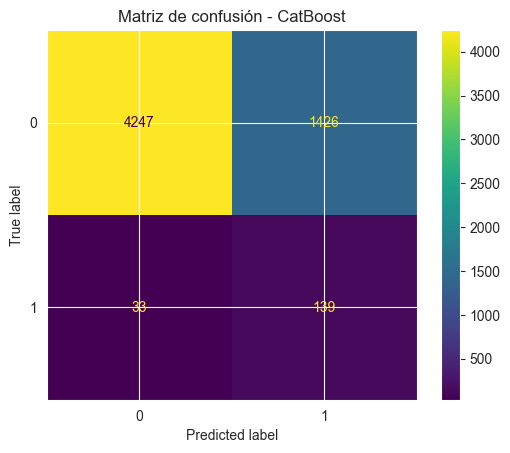

AUC-ROC (train): 0.9271
AUC-ROC (test) : 0.8590
PR-AUC  (train): 0.6408
PR-AUC  (test) : 0.4740
[CatBoost] Accuracy train: 0.9532 | test: 0.4719
[CatBoost] Balanced Acc train: 0.8368 | test: 0.6744
[CatBoost] Precision(1): 0.0475 | Recall(1): 0.8895 | F1(1): 0.0902
[CatBoost] Confusion matrix (test):
[[2605 3068]
 [  19  153]]


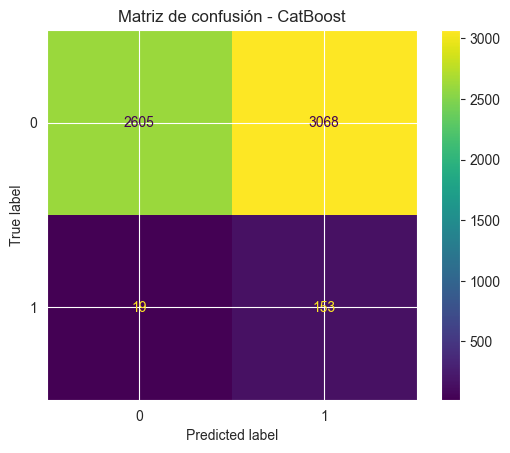

AUC-ROC (train): 0.9288
AUC-ROC (test) : 0.8365
PR-AUC  (train): 0.6408
PR-AUC  (test) : 0.3785
[CatBoost] Accuracy train: 0.9532 | test: 0.2520
[CatBoost] Balanced Acc train: 0.8354 | test: 0.5978
[CatBoost] Precision(1): 0.0366 | Recall(1): 0.9651 | F1(1): 0.0706
[CatBoost] Confusion matrix (test):
[[1307 4366]
 [   6  166]]


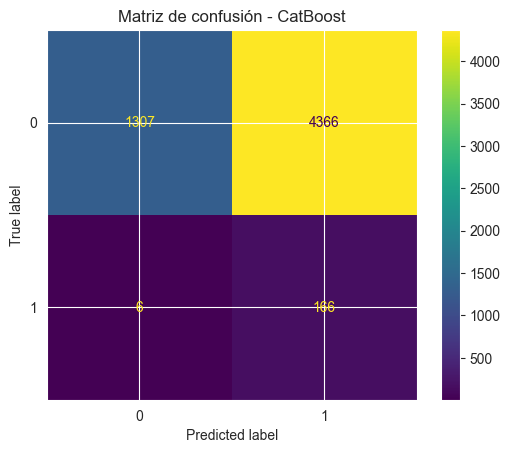

AUC-ROC (train): 0.9260
AUC-ROC (test) : 0.8288
PR-AUC  (train): 0.6166
PR-AUC  (test) : 0.3689
[CatBoost] Accuracy train: 0.9678 | test: 0.3988
[CatBoost] Balanced Acc train: 0.8028 | test: 0.6536
[CatBoost] Precision(1): 0.0434 | Recall(1): 0.9244 | F1(1): 0.0830
[CatBoost] Confusion matrix (test):
[[2172 3501]
 [  13  159]]


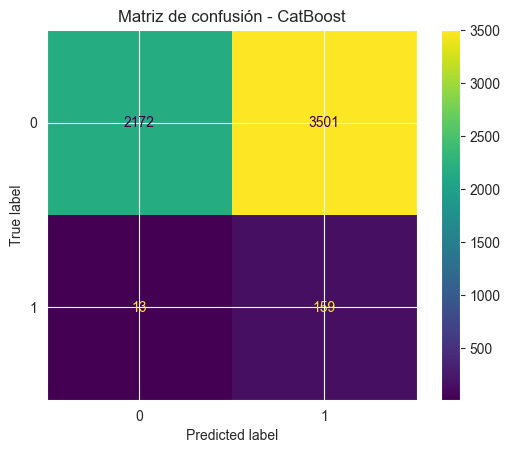

AUC-ROC (train): 0.9266
AUC-ROC (test) : 0.8406
PR-AUC  (train): 0.6151
PR-AUC  (test) : 0.3750
[CatBoost] Accuracy train: 0.9583 | test: 0.5030
[CatBoost] Balanced Acc train: 0.8367 | test: 0.6876
[CatBoost] Precision(1): 0.0500 | Recall(1): 0.8837 | F1(1): 0.0947
[CatBoost] Confusion matrix (test):
[[2788 2885]
 [  20  152]]


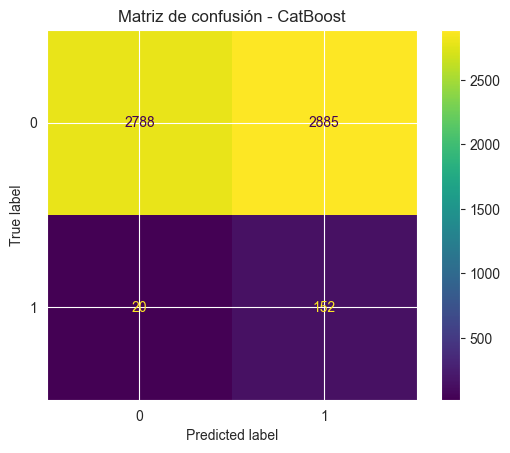

AUC-ROC (train): 0.9287
AUC-ROC (test) : 0.8318
PR-AUC  (train): 0.6495
PR-AUC  (test) : 0.3476
[CatBoost] Accuracy train: 0.9581 | test: 0.2144
[CatBoost] Balanced Acc train: 0.8344 | test: 0.5868
[CatBoost] Precision(1): 0.0355 | Recall(1): 0.9826 | F1(1): 0.0686
[CatBoost] Confusion matrix (test):
[[1084 4589]
 [   3  169]]


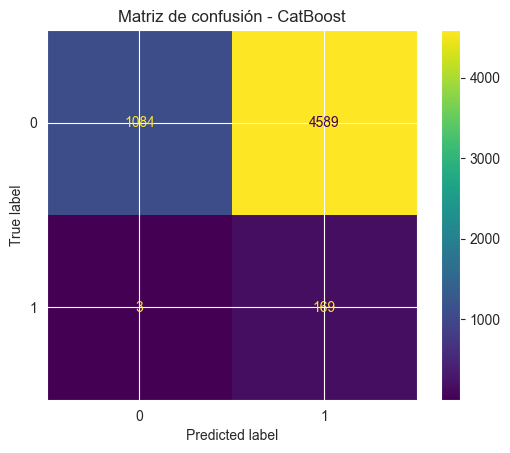

AUC-ROC (train): 0.9285
AUC-ROC (test) : 0.8198
PR-AUC  (train): 0.6406
PR-AUC  (test) : 0.3035
[CatBoost] Accuracy train: 0.9624 | test: 0.1388
[CatBoost] Balanced Acc train: 0.8169 | test: 0.5450
[CatBoost] Precision(1): 0.0323 | Recall(1): 0.9767 | F1(1): 0.0626
[CatBoost] Confusion matrix (test):
[[ 643 5030]
 [   4  168]]


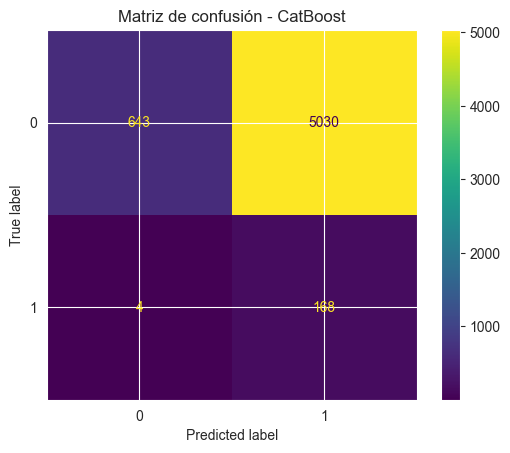

AUC-ROC (train): 0.9298
AUC-ROC (test) : 0.8213
PR-AUC  (train): 0.6273
PR-AUC  (test) : 0.3700
[CatBoost] Accuracy train: 0.9586 | test: 0.1589
[CatBoost] Balanced Acc train: 0.8262 | test: 0.5554
[CatBoost] Precision(1): 0.0331 | Recall(1): 0.9767 | F1(1): 0.0640
[CatBoost] Confusion matrix (test):
[[ 761 4912]
 [   4  168]]


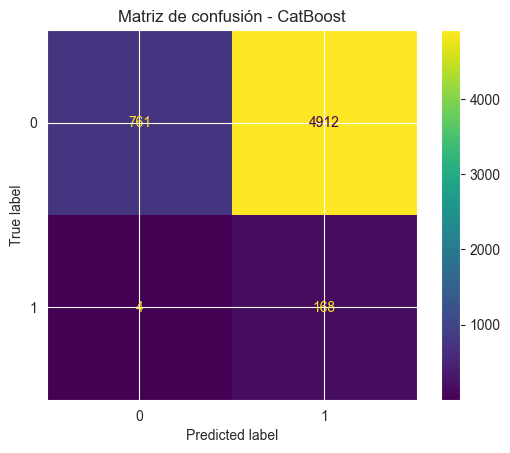

AUC-ROC (train): 0.9306
AUC-ROC (test) : 0.8176
PR-AUC  (train): 0.6255
PR-AUC  (test) : 0.3731
[CatBoost] Accuracy train: 0.9597 | test: 0.5680
[CatBoost] Balanced Acc train: 0.8296 | test: 0.7239
[CatBoost] Precision(1): 0.0575 | Recall(1): 0.8895 | F1(1): 0.1081
[CatBoost] Confusion matrix (test):
[[3167 2506]
 [  19  153]]


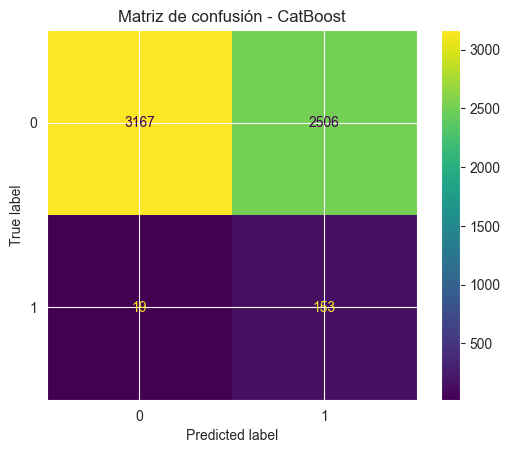

AUC-ROC (train): 0.9276
AUC-ROC (test) : 0.8472
PR-AUC  (train): 0.6448
PR-AUC  (test) : 0.3838
[CatBoost] Accuracy train: 0.9646 | test: 0.3027
[CatBoost] Balanced Acc train: 0.8208 | test: 0.6182
[CatBoost] Precision(1): 0.0388 | Recall(1): 0.9535 | F1(1): 0.0745
[CatBoost] Confusion matrix (test):
[[1605 4068]
 [   8  164]]


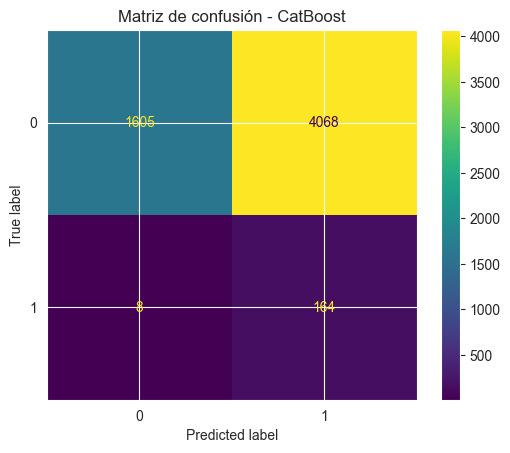

AUC-ROC (train): 0.9298
AUC-ROC (test) : 0.8107
PR-AUC  (train): 0.6326
PR-AUC  (test) : 0.3253
[CatBoost] Accuracy train: 0.9630 | test: 0.1290
[CatBoost] Balanced Acc train: 0.8172 | test: 0.5372
[CatBoost] Precision(1): 0.0318 | Recall(1): 0.9709 | F1(1): 0.0616
[CatBoost] Confusion matrix (test):
[[ 587 5086]
 [   5  167]]


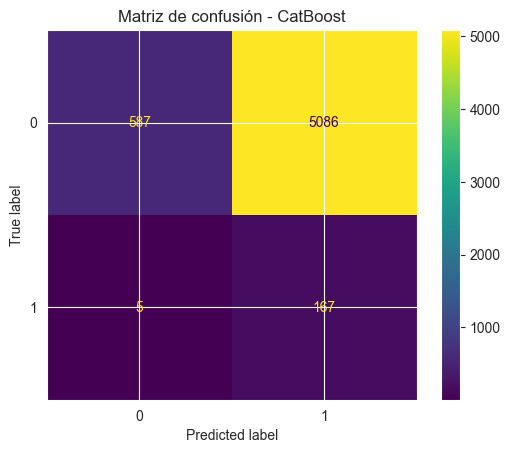

AUC-ROC (train): 0.9311
AUC-ROC (test) : 0.8145
PR-AUC  (train): 0.6213
PR-AUC  (test) : 0.3711
[CatBoost] Accuracy train: 0.9576 | test: 0.0751
[CatBoost] Balanced Acc train: 0.8292 | test: 0.5179
[CatBoost] Precision(1): 0.0305 | Recall(1): 0.9884 | F1(1): 0.0592
[CatBoost] Confusion matrix (test):
[[ 269 5404]
 [   2  170]]


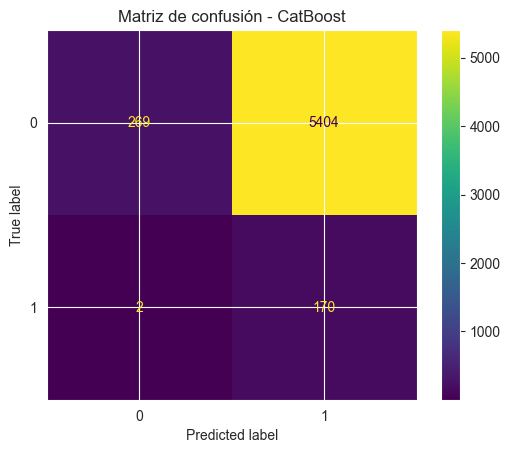

AUC-ROC (train): 0.9312
AUC-ROC (test) : 0.8205
PR-AUC  (train): 0.6284
PR-AUC  (test) : 0.3700


In [5]:
from src.model_utils.mod_evaluation import run_model_and_evaluate
from catboost import CatBoostClassifier

results = []
# Creamos la matriz con los mejores parámetros y creamos el modelo Catboost

best_params = {
    'bagging_temperature': 0.0,
    "learning_rate": 0.03,
    'depth': 4,
    'iterations': 800,
    'l2_leaf_reg': 3,
    'min_data_in_leaf': 20,
    'random_strength': 1,
    'rsm': 0.9
}

model = CatBoostClassifier(
    random_state=42,
    loss_function="Logloss",
    eval_metric="PRAUC",
    bootstrap_type="Bayesian",
    verbose=0,
    thread_count=-1,
    **best_params
)

# Ejecutamos el modelo Catboost con los mejores parámetros y obtenemos las métricas, guardamos los resultados para
# todas las ejecuciones con diferentes samplers y diferentes ratios.

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "svm_smote", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "svm_smote", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "svm_smote", 0.15
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "svm_smote", 0.2
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "ro", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "ro", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "ro", 0.15
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "ro", 0.2
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "b_smote", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "b_smote", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "b_smote", 0.15
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "b_smote", 0.2
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "smote", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "smote", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "smote", 0.15
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "smote", 0.2
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "adasyn", 0.05
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "adasyn", 0.1
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "adasyn", 0.15
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

rf, aucs, fp, fn, ex  = run_model_and_evaluate(
                X_train, y_train,
                X_test, y_test, 'CatBoost',model, "adasyn", 0.2
            )

results.append({**ex,  **rf, **aucs, "fp": len(fp), "fn": len(fn)})

Mostramos los resultados obtenidos en las ejecuciones

In [15]:
import pandas as pd

results

df_res = pd.DataFrame(results)

df_res

,threshold,val_precision_at_threshold,val_recall_at_threshold,val_fbeta_at_threshold,sampler,ratio,model,train_accuracy,test_accuracy,train_balanced_accuracy,...,tn,fp,fn,tp,conf_matrix,classification_report,auc-roc-train,auc-roc-test,pr-auc-train,pr-auc-test
0,0.154641,0.368201,0.642336,0.559085,None,NaN,Random_Forest,0.975659,0.959453,0.931705,...,5506,167,70,102,"[[5506, 167], [70, 102]]","{'0': {'precision': 0.9874461979913917, 'recal...",0.993487,0.889257,0.846159,0.549631
1,0.139092,0.329710,0.664234,0.552184,svm_smote,0.05,Random_Forest,0.969584,0.947134,0.948338,...,5423,250,59,113,"[[5423, 250], [59, 113]]","{'0': {'precision': 0.9892375045603794, 'recal...",0.992462,0.878869,0.836355,0.545044
2,0.168366,0.324910,0.656934,0.545455,svm_smote,0.10,Random_Forest,0.969285,0.914970,0.927010,...,5230,443,54,118,"[[5230, 443], [54, 118]]","{'0': {'precision': 0.9897804693414081, 'recal...",0.991889,0.870126,0.832795,0.507657
3,0.179478,0.314685,0.656934,0.539568,svm_smote,0.15,Random_Forest,0.969798,0.880753,0.927981,...,5022,651,46,126,"[[5022, 651], [46, 126]]","{'0': {'precision': 0.9909234411996843, 'recal...",0.991712,0.878733,0.833513,0.501518
4,0.157680,0.278932,0.686131,0.531073,svm_smote,0.20,Random_Forest,0.963125,0.812489,0.941481,...,4620,1053,43,129,"[[4620, 1053], [43, 129]]","{'0': {'precision': 0.9907784687969119, 'recal...",0.991569,0.865987,0.833119,0.499243
5,0.209003,0.380531,0.627737,0.555556,ro,0.05,Random_Forest,0.978097,0.960821,0.917435,...,5518,155,74,98,"[[5518, 155], [74, 98]]","{'0': {'precision': 0.9867668097281831, 'recal...",0.994498,0.889308,0.882275,0.539043
6,0.261872,0.376623,0.635036,0.558408,ro,0.10,Random_Forest,0.980707,0.961163,0.965359,...,5519,154,73,99,"[[5519, 154], [73, 99]]","{'0': {'precision': 0.9869456366237482, 'recal...",0.996893,0.889740,0.933549,0.540925
7,0.257920,0.351562,0.656934,0.559701,ro,0.15,Random_Forest,0.978782,0.956544,0.982718,...,5487,186,68,104,"[[5487, 186], [68, 104]]","{'0': {'precision': 0.9877587758775878, 'recal...",0.998494,0.889998,0.965514,0.546577
8,0.269606,0.344697,0.664234,0.560345,ro,0.20,Random_Forest,0.978525,0.956202,0.985409,...,5483,190,66,106,"[[5483, 190], [66, 106]]","{'0': {'precision': 0.9881059650387457, 'recal...",0.999225,0.890188,0.980190,0.538785
9,0.170886,0.351779,0.649635,0.555556,adasyn,0.05,Random_Forest,0.973049,0.938580,0.952240,...,5370,303,56,116,"[[5370, 303], [56, 116]]","{'0': {'precision': 0.989679321784003, 'recall...",0.993785,0.879464,0.857197,0.502692
